#Summary of the current satellite situation and distribution



Project definition: Satellites are now reaching a stage of commercialize usage, with 5540 satellite launches and 36 satellite attributes being recorded in the dataset, the project will be focused on discovering the similarities between satellites, finding patterns and determining the satellite trends. Ultimately provide a summary guide to map out the current satellites situation and supply insights about the satellite distribution.


Data source: https://www.ucsusa.org/resources/satellite-database (UCS Satellite Database updated May 1 2022)

Motivation: As SpaceX reaches success in satellite launch, it shows how satellites have been pushed towards a stage of commercialization. With more investment opportunities for satellites, it is paramount that companies know about the current satellite distribution.Therefore, summary of a satellite distribution can be a good guide to follow.


#Report Summary
   This project aims to summarize the current satellite situation and distribution. Utiliizing the dataset provided by UCS Satellite Database, aggregating features and discovering patterns. Through varies methods of data cleaning, we have prepared the columns and created subsets for analysis. Focusing on **country, year, user, purpose, class of orbit** and **lifetime**, we were able to determine a blueprint of satellite distribution and trends. Furthering this scope of search, detailed analysis with specific times and countries were able to be carried out. Thus, providing a better understanding of the satellite situation.


#Phase One

## Data Exploratory

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.frequencies import unique

In [ ]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/Shareddrives/MyDrive/ba780-a4-fall2/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import a country table for the purpose of validation and filteration. As this country table consists of only single countries, it will be used to filter out multiple countries in one.

In [ ]:
country = pd.read_csv('/content/drive/Shareddrives/ba780-a4-fall22/Dataset/all_countries.csv')
print(country.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country_ID  197 non-null    int64 
 1   country     197 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB
None


In [ ]:
#Import the csv file
satellite = pd.read_csv('/content/drive/Shareddrives/ba780-a4-fall22/Dataset/UCS-Satellite-Database-5-1-2022.csv')
print(satellite.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5467 entries, 0 to 5466
Data columns (total 68 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  5465 non-null   object 
 1   Current Official Name of Satellite  5465 non-null   object 
 2   Country/Org of UN Registry          4968 non-null   object 
 3   Country of Operator/Owner           5465 non-null   object 
 4   Operator/Owner                      5465 non-null   object 
 5   Users                               5465 non-null   object 
 6   Purpose                             5465 non-null   object 
 7   Detailed Purpose                    1140 non-null   object 
 8   Class of Orbit                      5465 non-null   object 
 9   Type of Orbit                       4843 non-null   object 
 10  Longitude of GEO (degrees)          5464 non-null   float64
 11  Perigee (km)                        5464 no

Through observations on the column, it is easy to notice there are many unnamed columns with few to no entries. Furthermore, multiple source columns can also be observed.These source columms have webisite url as entries, since these urls can't be easily used or engineered into useful columns, these source columns are dropped.

In [ ]:
#Dropping all the unamed and source columns
satellite_clean_1 = (satellite.drop(satellite.iloc[:,28:68] , axis = 1)).copy()
satellite_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5467 entries, 0 to 5466
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  5465 non-null   object 
 1   Current Official Name of Satellite  5465 non-null   object 
 2   Country/Org of UN Registry          4968 non-null   object 
 3   Country of Operator/Owner           5465 non-null   object 
 4   Operator/Owner                      5465 non-null   object 
 5   Users                               5465 non-null   object 
 6   Purpose                             5465 non-null   object 
 7   Detailed Purpose                    1140 non-null   object 
 8   Class of Orbit                      5465 non-null   object 
 9   Type of Orbit                       4843 non-null   object 
 10  Longitude of GEO (degrees)          5464 non-null   float64
 11  Perigee (km)                        5464 no

Column description:

**Name of Satellite, Alternate Names**: The current or most popularly used name; In parathesis are the alternative or previously used names  

**Country/Organization of UN Registry**: The country that is registered as responsible for the satellite in the United Nations. NR meaning not registered  

**Country of Operator/Owner**: The home country that operates or owns, or the home country of the business entity. Two or more countries are denoted as "MULTINATIONAL"    

**Operator/Owner**:Current operational controller, may be leasesd

**Users**:Affiliation of the primary users 

**Purpose**: The broad categories in which the satellite is used

**Detailed Purpose**: Extra information about the satellite's purpose

**Class of Orbit**: Nearly circular oribits, which includes Low Earth, Medium Earth and Geosynchronous Orbit; And elliptical orbits.

**Type of Orbit**: Nearly circular orbit have subsections of Equatorial, Nonpolar inclined, Polar, Sun-synchronous; Elliptical orbits have subsections of cislunar, Deep highly eccentric, Molniya

**Longitude of position in GEO**:For satellites in geosynchronous orbit, indicating the earth longitude of the point over which it sits

**Perigee**: The point of the orbit closest to the Earth's center of mass

**Apogee**: The point of orbit farthest from the Earth's center of mass

**Eccentricity**: How strongly the orbit deviates from a circle

**Inclination**: The angle between the orbital plane of the satellite and equatorial plance of the Earth

**Period**: The time required for the satellite to complete one full orbit of the Earth

**Laucnh mass**: The mass of the satellite at the time of lauch, with fuel included

**Dry Mass**: The mass of the satellite without fuel

**Power**:Amount of useable electric power produced by the satellite

**Date of launch**: The date in year, month, day the satellite was launched

**Expected Lifetime**: The planned operational lifetime of the satellite

**Contractor**: The prime contractor for the satellite's construction

**Country of Contractor**: The home nation of the corporation, institution or government agency that was prime contractor

**Launch Site**: Name or locatin of the lauch facility 

**Launch Vehicle**: The name and model of the launch vehicle used to lift the satalite into orbit

**COSPAR Number**: The international designation assigned by Committee on Space Research, this number reflects the year of launch and the sequence of launch

**NORAD Number**: Five digit number assigned by the North American Aerospace Defense Command

**Comments**: General description


**Note:**

**GEO:** Geosynchronous Equatorial Orbit. Orbiting at around 35,000 km (22,000 miles) above the surface, GEO move at the same velocity as the Earth and on a path that is parallel to the Earth’s rotation.

**MEO:** Medium Earth Orbit. Occupying the space between 5,000 and 12,000 km (3,100 – 7,500 miles). Their relative proximity to Earth means they achieve far lower latency than GEO units, making them suitable for high-speed telephone signals and similar missions.


**LEO:** Low Earth Orbit. Orbiting at 800 – 1,600 km (500 – 1,000 miles) above the surface. This proximity to Earth makes them ideal for very high speed, low latency communications, often exhibiting a delay of just 0.05 seconds.

**Active Satellites**: The database includes only “active” satellites: satellites that are currently maneuvering and/or communicating. This excludes satellites still orbiting but now no longer in use, though some of these may be still occasionally used for training operators or other secondary purposes. This also excludes passive satellites used.



##Data Cleaning

In [ ]:
satellite_clean_1.rename(columns = {' Dry Mass (kg.) ': 'Dry_Mass'}, inplace = True)
print(satellite_clean_1.columns)

Index(['Name of Satellite, Alternate Names',
       'Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry_Mass', 'Power (watts)', 'Date of Launch',
       'Expected Lifetime (yrs.)', 'Contractor', 'Country of Contractor',
       'Launch Site', 'Launch Vehicle', 'COSPAR Number', 'NORAD Number',
       'Comments'],
      dtype='object')


####1.Determining unique row identifiers

In order to have a definitive id for each row of the dataframe, we want to examine the 'Name of Satellite, Alternate Names' column first, check to see if the variable are unique, so that they can be used as an unique ID for each observation. Through investigation, there are 5458 unique Satellites, and there are 5467 of totally satellite launched, meaning satellites with the same name can be launched twice. So for the next stage, we will need to clean the data, and generate unique identifiers for each record.

In [ ]:
#Count unique Name of Stallite, Alternate Names, and see if each row is unique
Num_Satellite = len(satellite['Name of Satellite, Alternate Names'].unique())
Total_Record = len(satellite['Name of Satellite, Alternate Names'])

Total_Record > Num_Satellite
"Number of unique Satellites are: {}, and there are: {} total number of satellite launched".format(len(satellite['Name of Satellite, Alternate Names'].unique()),len(satellite['Name of Satellite, Alternate Names']))

'Number of unique Satellites are: 5458, and there are: 5467 total number of satellite launched'

####2.Using index of the dataframe to identify the records

After discovering the fact that total record of satellites are greater than number of unique satellites. Therefore, we chose to assign a new column called index as the unique identifier, the range was chosen by the length of total satellites, meaning each record will get an unique identifier. To examine the validity of this, we checked the length of total records and number of index.

In [ ]:
#Only execute this code once! Do not re-execute.
satellite_clean_1.reset_index(inplace = True)

In [ ]:
satellite_clean_1.head(3)

,index,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,...,Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments
0,0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,...,NaN,2019/12/11,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859.0,Pathfinder for planned earth observation const...
1,1,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,...,4.50,2017/6/23,2.0,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775.0,Technology development and education.
2,2,AAUSat-4,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,...,NaN,2016/4/25,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz-2.1a,2016-025E,41460.0,Carries AIS system.


In [ ]:
len(satellite_clean_1['index']) == satellite_clean_1.shape[0]

True

####3.Evaluating data quality

In order to better prepare the data for data analysis, we  want to exam the data quality in dataframe after dropping the Source column and other Unnamed columns


In [ ]:
satellite_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5467 entries, 0 to 5466
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   index                               5467 non-null   int64  
 1   Name of Satellite, Alternate Names  5465 non-null   object 
 2   Current Official Name of Satellite  5465 non-null   object 
 3   Country/Org of UN Registry          4968 non-null   object 
 4   Country of Operator/Owner           5465 non-null   object 
 5   Operator/Owner                      5465 non-null   object 
 6   Users                               5465 non-null   object 
 7   Purpose                             5465 non-null   object 
 8   Detailed Purpose                    1140 non-null   object 
 9   Class of Orbit                      5465 non-null   object 
 10  Type of Orbit                       4843 non-null   object 
 11  Longitude of GEO (degrees)          5464 no

In [ ]:
satellite_clean_1.head(3)

,index,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,...,Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments
0,0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,...,NaN,2019/12/11,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859.0,Pathfinder for planned earth observation const...
1,1,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,...,4.50,2017/6/23,2.0,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775.0,Technology development and education.
2,2,AAUSat-4,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,...,NaN,2016/4/25,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz-2.1a,2016-025E,41460.0,Carries AIS system.


In [ ]:
satellite_clean_1.groupby('Country of Operator/Owner')['index'].count().sort_values()

Country of Operator/Owner
ESA/USA/Russia                   1
Estonia                          1
Taiwan                           1
USA/India/Singapore/Taiwan       1
France/Israel                    1
                              ... 
Japan                           88
Russia                         170
United Kingdom                 486
China                          535
USA                           3415
Name: index, Length: 108, dtype: int64

####4.Converting multi countries to multinational

It can be obsered that there are 'multinational' for certain columns displayed from the head table. Moreover, in the groupby function performed above, there is data showing multiple countries, for example USA/India/Singapore/Taiwan. For the ease of data analysis, we want to convert the above cases to 'multination'.To avoid a case sensitive issue, we will format them into  all capitalized letters.

In [ ]:
satellite_clean_1['Country of Operator/Owner'] = satellite_clean_1['Country of Operator/Owner'].str.upper()
country['country'] = country['country'].str.upper()
satellite_clean_1.head(1)

,index,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,...,Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments
0,0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,...,NaN,2019/12/11,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859.0,Pathfinder for planned earth observation const...


####5.Continued cleaning for country names 

Using the groupby function,we can filter out certain incomplete data. Sorting out countries in 'Country of Operator/Owner'from the dataframe, using the country table to find records that are not single countries. Based on different situation, the cleaning method can vary. ESA stands for the European Space Agency, it does not counted as incomplete data, hence will not be reformatted.

In [ ]:
satellite_clean_2 = satellite_clean_1[satellite_clean_1['Country of Operator/Owner'].isin(country['country']) == False][satellite_clean_1['Country of Operator/Owner'] != 'MULTINATIONAL']
satellite_clean_2.groupby('Country of Operator/Owner')['index'].count()

<ipython-input-82-ea1f17decb5d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  satellite_clean_2 = satellite_clean_1[satellite_clean_1['Country of Operator/Owner'].isin(country['country']) == False][satellite_clean_1['Country of Operator/Owner'] != 'MULTINATIONAL']


Country of Operator/Owner
CHINA                                 1
CHINA/BRAZIL                          2
CHINA/FRANCE                          2
CHINA/ITALY                           1
ESA/USA                               1
ESA/USA/RUSSIA                        1
FRANCE/BELGIUM/SWEDEN                 2
FRANCE/ISRAEL                         1
FRANCE/ITALY                          3
FRANCE/ITALY/BELGIUM/SPAIN/GREECE     2
FRANCE/USA                            1
GREECE/UNITED KINGDOM                 1
INDIA/CANADA                          1
INDIA/FRANCE                          2
JAPAN/SINGAPORE                       2
MOROCCO/GERMANY                       1
POLAND/UK                             1
RUSSIA/USA                            2
SINGAPORE/TAIWAN                      1
TAIWAN/USA                           11
TURKMENISTAN/MONACO                   1
UNITED KINGDOM/ESA                    1
UNITED KINGDOM/NETHERLANDS            1
USA/ARGENTINA                         4
USA/CANADA    

In [ ]:
#From the manual observation, we found that the index = 219 contain China with 2 extra space behind the variable
#Record for index 219 is not a cleaned data
satellite_clean_1[satellite_clean_1['index'] == 219]

,index,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,...,Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments
219,219,Beijing-3,Beijing-3,NR (1/22),CHINA,21st Century Aerospace Technology (21AT),Commercial,Earth Observation,Optical Imaging,LEO,...,NaN,2021/6/11,NaN,Chinese Academy of Space Technology (CASC),China,Taiyuan Launch Center,Long March 2D,2021-050A,48840.0,First of this company's satellites to be built...


In [ ]:
#Overwrite the name for record index = 219 to a cleaned data
satellite_clean_1.loc[satellite_clean_1['index'] == 219,'Country of Operator/Owner'] = 'CHINA'

In [ ]:
#Drop None for Country of Operator/Owner field
satellite_clean_1.dropna(subset=['Country of Operator/Owner'],inplace=True)

In [ ]:
satellite_clean_1[satellite_clean_1['Country of Operator/Owner'].isin(country['country']) == False]

,index,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,...,Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments
3,3,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,MULTINATIONAL,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,...,"16,000.00",2014/2/6,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508.0,"32 C-band, 51 Ku-band, and 6 Ka-band transpond..."
4,4,ABS-2A,ABS-2A,NR,MULTINATIONAL,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,...,NaN,2016/6/15,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588.0,NaN
5,5,ABS-3A,ABS-3A,NR,MULTINATIONAL,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,...,NaN,2015/3/2,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2015-010A,40424.0,Coverage of Americas Europe and Africa.
6,6,"ABS-4 (ABS-2i, MBSat, Mobile Broadcasting Sate...",ABS-4,NR,MULTINATIONAL,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,...,"7,400.00",2004/3/13,12.0,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184.0,Purchased by ABS in 2013.
7,7,"ABS-6 (ABS-1, LMI-1, Lockheed Martin-Intersput...",ABS-6,NR,MULTINATIONAL,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,...,"6,800 (EOL)",1999/9/26,15.0,Lockheed Martin,USA,Baikonur Cosmodrome,Proton,1999-053A,25924.0,"28 C-band, 16 Ku-band; business services, publ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5111,5111,THEMIS E (Time History of Events and Macroscal...,THEMIS E,USA,MULTINATIONAL,National Aeronautics and Space Administration ...,Government/Civil,Space Science,NaN,Elliptical,...,40.00,2007/2/17,2.0,Swales Aerospace,USA,Cape Canaveral,Delta 2,2007-004E,30798.0,Five phase mission to study earth's auroras; m...
5164,5164,"TianYi-15 (Xiaoxiang 1-08, Dianfeng)",Xiaoxiang 1-08,China,CHINA/FRANCE,Spacety Aerospace Company/ThrustMe,Commercial,Technology Development,NaN,LEO,...,NaN,2019/11/3,NaN,Spacety Aerospace Co.,China,Taiyuan Launch Center,Long March 4B,2019-072D,44706.0,Testing an iodine-based propulsion system.
5191,5191,Turkmen Alem 52E/MonacoSAT,Turkmen Alem 52E/MonacoSAT,NR,TURKMENISTAN/MONACO,Turkmenistan Ministry of Communications/SSI-Mo...,Government/Commercial,Communications,NaN,GEO,...,NaN,2015/4/27,15.0,Thales Alenia Space,France/Italy,Cape Canaveral,Falcon 9,2015-023A,40617.0,Joint ownership - Turkmenistan 26 transponders...
5242,5242,Venµs,Venµs,Israel,FRANCE/ISRAEL,Centre National d'Etudes Spatiales (CNES)/Isra...,Government,Earth Observation,Optical Imaging,LEO,...,NaN,2017/8/1,4.5,Israel Aerospace Industries (IAI),Israel,Guiana Space Center,Vega,2017-044B,42901.0,"Resolution of 5 meters (16 feet), the spectral..."


In [ ]:
#Change records with two or more countries into Multinational
satellite_clean_1.loc[(satellite_clean_1['Country of Operator/Owner'].isin(country['country']) == False),'Country of Operator/Owner'] = 'MULTINATIONAL'

In [ ]:
satellite_clean_1.groupby('Country of Operator/Owner')['index'].count()

Country of Operator/Owner
ALGERIA                    5
ARGENTINA                 35
AUSTRALIA                 14
AUSTRIA                    1
AZERBAIJAN                 2
                        ... 
UNITED ARAB EMIRATES      13
UNITED KINGDOM           486
USA                     3415
VENEZUELA                  2
VIETNAM                    5
Name: index, Length: 75, dtype: int64

####6.Cleaning Country/Org of UN Registry 

The 'Country/Org of UN Registry' column needs to be cleaned as well, using a similar method.

In [ ]:
satellite_clean_1['Country/Org of UN Registry'] = satellite_clean_1['Country/Org of UN Registry'].str.upper()
satellite_clean_1['Country of Contractor'] = satellite_clean_1['Country of Contractor'].str.upper()
satellite_clean_1.head(3)

,index,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,...,Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments
0,0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,...,NaN,2019/12/11,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859.0,Pathfinder for planned earth observation const...
1,1,Aalto-1,Aalto-1,FINLAND,FINLAND,Aalto University,Civil,Technology Development,NaN,LEO,...,4.50,2017/6/23,2.0,Aalto University,FINLAND,Satish Dhawan Space Centre,PSLV,2017-036L,42775.0,Technology development and education.
2,2,AAUSat-4,AAUSat-4,DENMARK,DENMARK,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,...,NaN,2016/4/25,NaN,University of Aalborg,DENMARK,Guiana Space Center,Soyuz-2.1a,2016-025E,41460.0,Carries AIS system.


In [ ]:
satellite_clean_1[satellite_clean_1['Country of Contractor'].isin(country['country']) == False].groupby('Country of Contractor')['index'].count()

Country of Contractor
CANADA/ITALY                       1
CHINA                              2
CHINA/AUSTRIA                      1
CHINA/ETHIOPIA                     1
CHINA/FRANCE                       2
CHINA/ITALY                        1
CHINA/UK                           1
DENMARK/CANADA                     3
ESA/EADS CASA ESPACIO              1
FRANCE, UK, GERMANY                1
FRANCE/BELGIUM/SPAIN/ITALY         1
FRANCE/GERMANY/SPACE               2
FRANCE/ITALY                      24
FRANCE/ITALY/USA                  75
FRANCE/UK/GERMANY                 18
FRANCE/UK/GERMANY/SPAIN           33
FRANCE/UK/GERMANY/SPAIN/ITALY      2
FRANCE/UK/SPAIN                    1
GERMANY/FRANCE                     3
GERMANY/UK                        24
GERMANY/UK/FRANCE/SPAIN            1
GERMANY/UK/ITALY                   4
INTERNATIONAL                      7
ITALY/GERMANY                      1
ITALY/INTERNATIONAL                1
JAPAN/SINGAPORE                    1
JAPAN/USA/UK/GER

In [ ]:
#Transfer the UK to UNITED KINGDOM, so that it will maintain the consistency across different columns
satellite_clean_1.loc[satellite_clean_1['Country of Contractor'] == 'UK','Country of Contractor'] = 'UNITED KINGDOM'

In [ ]:
# #According to a manual check, there are two spaces after the country name CHINA, we need to replace it to CHINA
satellite_clean_1.loc[satellite_clean_1['Country of Contractor'] == 'CHINA ','Country of Contractor'] = 'CHINA'
#delete after confirmation with team

In [ ]:
satellite_clean_1.loc[(satellite_clean_1['Country of Contractor'].isin(country['country']) == False),'Country of Contractor'] = "MULTINATIONAL"

In [ ]:
satellite_clean_1.groupby('Country of Contractor')['index'].count()

Country of Contractor
ARGENTINA                 32
AUSTRALIA                  5
AUSTRIA                    1
BELGIUM                    5
BRAZIL                     5
BULGARIA                   1
CANADA                    37
CHILE                      2
CHINA                    542
CZECH REPUBLIC             3
DENMARK                   15
ECUADOR                    1
EGYPT                      1
ESA                        4
ESTONIA                    1
FINLAND                   19
FRANCE                    93
GERMANY                   43
HUNGARY                    1
INDIA                     61
INDONESIA                  2
IRAN                       1
ISRAEL                    29
ITALY                     41
JAPAN                     80
JORDAN                     1
KAZAKHSTAN                 1
LITHUANIA                  3
LUXEMBOURG                13
MALAYSIA                   1
MEXICO                     3
MULTINATIONAL            250
NEPAL                      1
NETHERLANDS          

####7.Splitting the date into new columns

We want to split the launch year from the date column in our satellite dataframe to make two new columns, namely year and month. And we want to keep Launch_Year and Launch_Month in integer instead of Datetime for following reasons:

(1) We analysis which month across all years have the highest launching activity; in another word, is there a correlation between month and launching activities

(2) Overall transferring the Launch_Year and Launch_Month does not help on our futher analysis, so we will keep those in Integer type

In [ ]:
satellite_df = satellite_clean_1.copy()
date_df = satellite_df['Date of Launch'].str.split("/", n=2, expand = True)
satellite_clean_1["Year_of_Launch"]= date_df[0]
satellite_clean_1["Month_of_Launch"]= date_df[1]
satellite_clean_1.drop(columns =["Date of Launch"], inplace = True)

In [ ]:
#Change the data type of 'Year_of_Launch' from object to integer, the Month_of_Launch as well
satellite_clean_1['Year_of_Launch'] = pd.to_numeric(satellite_clean_1['Year_of_Launch'])
satellite_clean_1['Month_of_Launch'] = pd.to_numeric(satellite_clean_1['Month_of_Launch'])

In [ ]:
#Since there are null values in the 'Month of Launch', those do not mean anything, we want to exclude those rows
satellite_clean_1 = satellite_clean_1[satellite_clean_1["Month_of_Launch"].isnull() == False]
satellite_clean_1["Month_of_Launch"].isnull().sum()

0

In [ ]:
final_satellite = satellite_clean_1.copy()
#final_satellite.to_csv('final_satellite_table.csv')

In [ ]:
final_satellite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5465 entries, 0 to 5464
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   index                               5465 non-null   int64  
 1   Name of Satellite, Alternate Names  5465 non-null   object 
 2   Current Official Name of Satellite  5465 non-null   object 
 3   Country/Org of UN Registry          4968 non-null   object 
 4   Country of Operator/Owner           5465 non-null   object 
 5   Operator/Owner                      5465 non-null   object 
 6   Users                               5465 non-null   object 
 7   Purpose                             5465 non-null   object 
 8   Detailed Purpose                    1140 non-null   object 
 9   Class of Orbit                      5465 non-null   object 
 10  Type of Orbit                       4843 non-null   object 
 11  Longitude of GEO (degrees)          5464 no

####8.Creating UserC column from cleaning Users column

Examining the Users column, we found that "Commercial" has two seperate categorys, "Government" and "Military" as well. This is because they have a space after. So we delete the space after the value and create a new column named "UserC". Further investigation shows that "Civil/Commercial" is the same as "Government/Civil", and other combination have similar issues. So we set all of these types of names to a same name. 

In [ ]:
s = []
for i in range(0,len(final_satellite["Users"])):
  s.append(final_satellite["Users"][i].strip())
unique(s)
final_satellite["UserC"] = s

final_satellite[final_satellite["Users"]=="Earth Observation"]
final_satellite.loc[final_satellite["Users"]=="Earth Observation","Users"] = "Military"

final_satellite["UserC"][final_satellite["UserC"]=="Civil/Commercial"] = "Commercial/Civil"
final_satellite["UserC"][final_satellite["UserC"]=="Civil/Government"] = "Government/Civil"
final_satellite["UserC"][final_satellite["UserC"]=="Civil/Military"] = "Military/Civil"
final_satellite["UserC"][final_satellite["UserC"]=="Commercial/Government"] = "Government/Commercial"
final_satellite["UserC"][final_satellite["UserC"]=="Commercial/Military"] = "Military/Commercial"
final_satellite["UserC"][final_satellite["UserC"]=="Government/Military"] = "Military/Government"
print(final_satellite.groupby("UserC")["index"].count())

final_satellite.drop(columns =["Users"], inplace = True)
final_clean_satellite = final_satellite.copy()
final_clean_satellite.info()

UserC
Civil                              152
Commercial                        4047
Commercial/Civil                     6
Communications                       8
Earth Observation                    1
Government                         527
Government/Civil                    49
Government/Commercial               98
Government/Commercial/Military       1
Military                           424
Military/Civil                      10
Military/Commercial                 81
Military/Government                 61
Name: index, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5465 entries, 0 to 5464
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   index                               5465 non-null   int64  
 1   Name of Satellite, Alternate Names  5465 non-null   object 
 2   Current Official Name of Satellite  5465 non-null   object 
 3   Country/Org of UN Regist

<ipython-input-100-a44c57c93f20>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_satellite["UserC"][final_satellite["UserC"]=="Civil/Commercial"] = "Commercial/Civil"
<ipython-input-100-a44c57c93f20>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_satellite["UserC"][final_satellite["UserC"]=="Civil/Government"] = "Government/Civil"
<ipython-input-100-a44c57c93f20>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_

#### 9.Creating a subset of the dataframe mass_dataset, to target dry_mass

Select Name of Satellite, the Dry_Mass, Launch Mass (kg.), Launch Vehicle, Country of Operator/Owner, Purpose, Month_of_Launch, and Year_of_Launch from the dataset without Nulls.

In [ ]:
mass_dataset = final_satellite[['Name of Satellite, Alternate Names','Country of Operator/Owner','Launch Mass (kg.)','Launch Vehicle','Dry_Mass','Month_of_Launch','Year_of_Launch','Purpose']]

In [ ]:
mass_dataset_final = mass_dataset.dropna()

check for the data validation

In [ ]:
mass_dataset_final.isnull().sum()

Name of Satellite, Alternate Names    0
Country of Operator/Owner             0
Launch Mass (kg.)                     0
Launch Vehicle                        0
Dry_Mass                              0
Month_of_Launch                       0
Year_of_Launch                        0
Purpose                               0
dtype: int64

In [ ]:
mass_dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 6 to 5446
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Name of Satellite, Alternate Names  439 non-null    object
 1   Country of Operator/Owner           439 non-null    object
 2   Launch Mass (kg.)                   439 non-null    object
 3   Launch Vehicle                      439 non-null    object
 4   Dry_Mass                            439 non-null    object
 5   Month_of_Launch                     439 non-null    int64 
 6   Year_of_Launch                      439 non-null    int64 
 7   Purpose                             439 non-null    object
dtypes: int64(2), object(6)
memory usage: 30.9+ KB


We find the data quality issue in Launch Mass and Dry Masss column; since these two columns contain the unwanted comma, we want to remove those first and then convert it into the integer.

In [ ]:
mass_dataset_final.head(3)

,"Name of Satellite, Alternate Names",Country of Operator/Owner,Launch Mass (kg.),Launch Vehicle,Dry_Mass,Month_of_Launch,Year_of_Launch,Purpose
6,"ABS-4 (ABS-2i, MBSat, Mobile Broadcasting Sate...",MULTINATIONAL,"4,143",Atlas 3,"1,700",3,2004,Communications
7,"ABS-6 (ABS-1, LMI-1, Lockheed Martin-Intersput...",MULTINATIONAL,"2,894",Proton,"1,730",9,1999,Communications
42,"Afghansat-1 (Eutelsat 48D [Eutelsat 48B, Eutel...",MULTINATIONAL,"3,460",Ariane 5,"1,555",12,2008,Communications


In [ ]:
mass_dataset_final["Launch Mass (kg.)"]=mass_dataset_final["Launch Mass (kg.)"].str.replace(",","").astype(np.int64)

<ipython-input-106-ff92a6d879c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mass_dataset_final["Launch Mass (kg.)"]=mass_dataset_final["Launch Mass (kg.)"].str.replace(",","").astype(np.int64)


In [ ]:
mass_dataset_final["Dry_Mass"]=mass_dataset_final["Dry_Mass"].str.replace(",","")
mass_dataset_final["Dry_Mass"]=mass_dataset_final["Dry_Mass"].str.replace("-","")

<ipython-input-107-3ecae85af702>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mass_dataset_final["Dry_Mass"]=mass_dataset_final["Dry_Mass"].str.replace(",","")
<ipython-input-107-3ecae85af702>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mass_dataset_final["Dry_Mass"]=mass_dataset_final["Dry_Mass"].str.replace("-","")


In [ ]:
#Through the mannual check, index 2438 and 2440 has blank as value but did not drop by dropna function
mass_dataset_final = mass_dataset_final.reset_index().drop(columns=["index"], axis = 1)

In [ ]:
mass_dataset_final = mass_dataset_final.drop([352],axis=0)

In [ ]:
mass_dataset_final['Dry_Mass'] = mass_dataset_final['Dry_Mass'].astype(np.int64)

In [ ]:
#Data validation step: to drop the Launch Mass <= Dry_Mass
filtering = mass_dataset_final['Launch Mass (kg.)'] <= mass_dataset_final['Dry_Mass']
mass_dataset_final[filtering]

,"Name of Satellite, Alternate Names",Country of Operator/Owner,Launch Mass (kg.),Launch Vehicle,Dry_Mass,Month_of_Launch,Year_of_Launch,Purpose
13,AprizeSat 1 (LatinSat-C),ARGENTINA,12,Dnepr,12,6,2004,Communications/Technology Development
14,AprizeSat 10 (exactView-13),MULTINATIONAL,12,Dnepr,12,6,2014,Communications/Maritime Tracking
15,AprizeSat 2 (LatinSat-D),ARGENTINA,12,Dnepr,12,6,2004,Communications/Technology Development
16,AprizeSat 3,MULTINATIONAL,12,Dnepr,12,7,2009,Communications/Maritime Tracking
17,AprizeSat 4,MULTINATIONAL,12,Dnepr,12,7,2009,Communications/Maritime Tracking
18,AprizeSat 5,CANADA,12,Dnepr,12,8,2011,Communications
19,AprizeSat 7,CANADA,12,Dnepr,12,11,2013,Communications
20,AprizeSat 8 (exactView-12),MULTINATIONAL,12,Dnepr,12,11,2013,Communications/Maritime Tracking
21,AprizeSat 9 (exactView-11),CANADA,12,Dnepr,12,6,2014,Communications/Maritime Tracking
79,Cesium Satellite 1,USA,10,Atlas 5,10,9,2021,Technology Development


In [ ]:
mass_dataset_final = mass_dataset_final.drop(mass_dataset_final[filtering].index,axis=0)

In [ ]:
#Check the results
mass_dataset_final[filtering]

<ipython-input-113-c8eaab6da903>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mass_dataset_final[filtering]


,"Name of Satellite, Alternate Names",Country of Operator/Owner,Launch Mass (kg.),Launch Vehicle,Dry_Mass,Month_of_Launch,Year_of_Launch,Purpose


In [ ]:
mass_dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 438
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Name of Satellite, Alternate Names  410 non-null    object
 1   Country of Operator/Owner           410 non-null    object
 2   Launch Mass (kg.)                   410 non-null    int64 
 3   Launch Vehicle                      410 non-null    object
 4   Dry_Mass                            410 non-null    int64 
 5   Month_of_Launch                     410 non-null    int64 
 6   Year_of_Launch                      410 non-null    int64 
 7   Purpose                             410 non-null    object
dtypes: int64(4), object(4)
memory usage: 28.8+ KB


##Data exploration

###Question 1: Which countries had the most records? What are the distributions of users for each?

The USA, China, the UK and Russia had the most records, within this the USA has substantially more records, at 3415. This is almost 7 times the records of China. A follow up investigation included users, we discovered that the majority of records in the UK and the US were for commercial use. And for China, the most records are used in commercial and government. Lastly, for Russia, military had the most records.

Country of Operator/Owner
USA               3415
CHINA              536
UNITED KINGDOM     486
RUSSIA             170
Name: UserC, dtype: int64
------------------------------


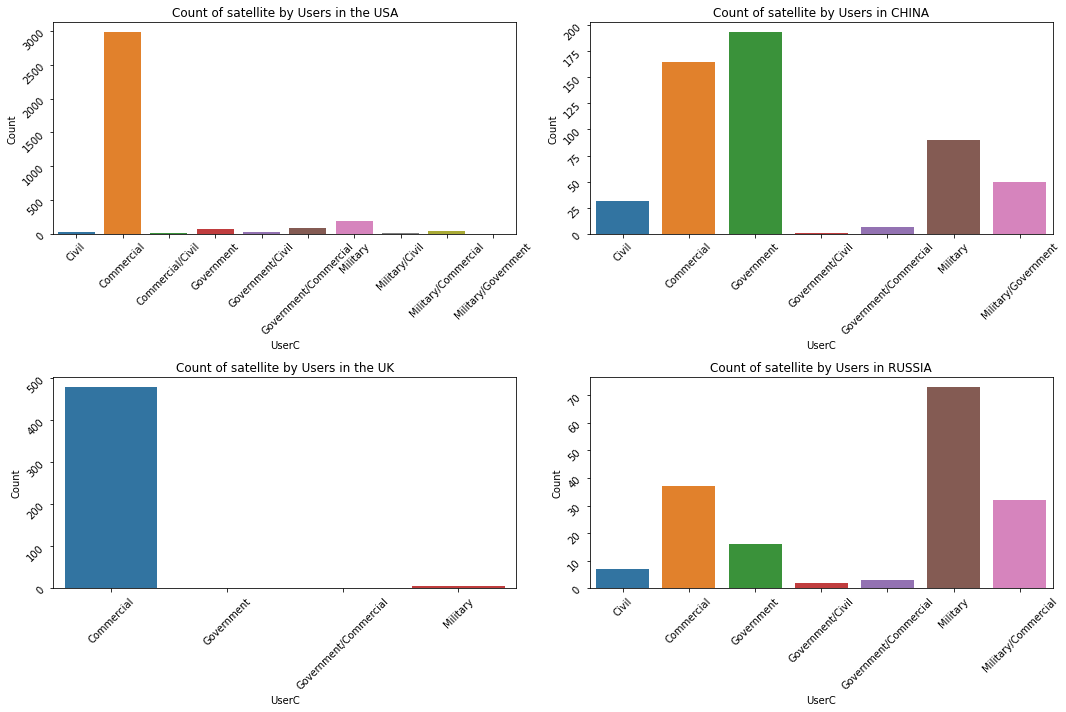

In [ ]:
final_clean_satellite_sort = (final_clean_satellite.groupby('Country of Operator/Owner')['UserC'].count()).sort_values(ascending = False)

print(final_clean_satellite_sort.loc[final_clean_satellite_sort.index[0:4]] )
print('-'*30)

satellite_top_country = final_clean_satellite[final_clean_satellite['Country of Operator/Owner'].isin(['USA','CHINA','UNITED KINGDOM','RUSSIA','MULTINATIONAL' ])].copy()

satellite_top_country_gb = satellite_top_country.groupby(['Country of Operator/Owner','UserC'])["index"].count().to_frame("Count").reset_index()
satellite_top_country_gb.sort_values(by="Count", ascending=False)

fig,ax = plt.subplots(2, 2, figsize = (15,10), tight_layout = True)
sns.barplot(x='UserC',y="Count", data=satellite_top_country_gb[satellite_top_country_gb["Country of Operator/Owner"] == "USA"],ax=ax[0,0]).set(title='Count of satellite by Users in the USA')
ax[0,0].tick_params(labelrotation=45)
sns.barplot(x='UserC',y="Count", data=satellite_top_country_gb[satellite_top_country_gb["Country of Operator/Owner"] == "CHINA"],ax=ax[0,1]).set(title='Count of satellite by Users in CHINA')
sns.barplot(x='UserC',y="Count", data=satellite_top_country_gb[satellite_top_country_gb["Country of Operator/Owner"] == "UNITED KINGDOM"],ax=ax[1,0]).set(title='Count of satellite by Users in the UK')
sns.barplot(x='UserC',y="Count", data=satellite_top_country_gb[satellite_top_country_gb["Country of Operator/Owner"] == "RUSSIA"],ax=ax[1,1]).set(title='Count of satellite by Users in RUSSIA')
ax[0,1].tick_params(labelrotation=45)
ax[1,0].tick_params(labelrotation=45)
ax[1,1].tick_params(labelrotation=45)
plt.show()

###Question 2:How do the number of records from the top 10 countries compare over time?

The top 10 countries are USA, China, UK, Russia, Multinational, Japan, ESA,India, Canada, Germany. From the line graph,and slow increase can be seen from these countries up until 2015. After 2015, the USA, China and the UK all have sharp increases, especially for the USA. Followed by an extreme decline in 2021.

In [ ]:
Satellite_Released_byCountry = final_clean_satellite.groupby(["Country of Operator/Owner"])["index"].count().sort_values(ascending=False).to_frame("Counts").reset_index()
Satellite_Released_byCountry.head(10)

,Country of Operator/Owner,Counts
0,USA,3415
1,CHINA,536
2,UNITED KINGDOM,486
3,RUSSIA,170
4,MULTINATIONAL,119
5,JAPAN,88
6,ESA,62
7,INDIA,59
8,CANADA,56
9,GERMANY,45


Text(0, 0.5, 'Record count')

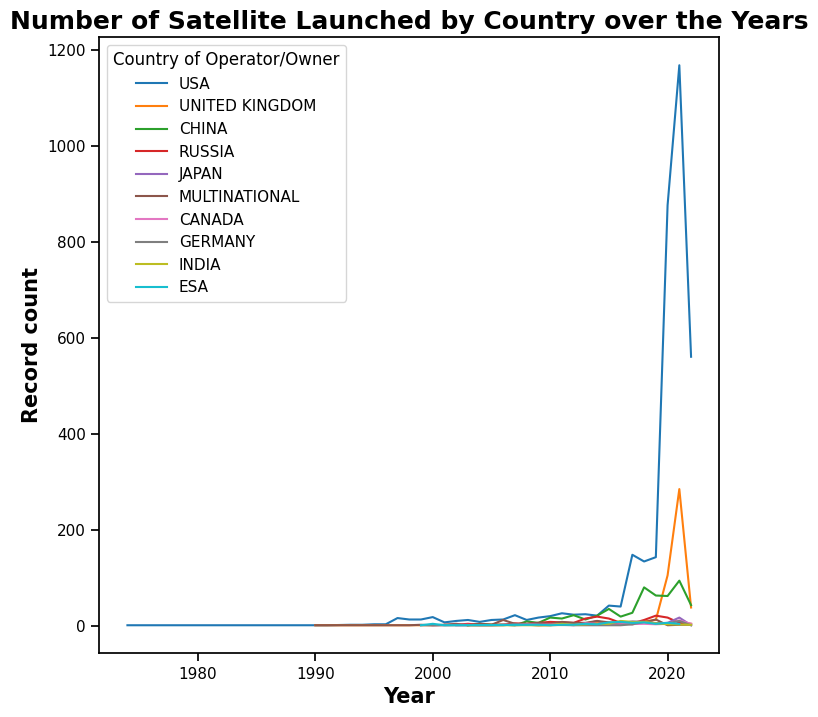

In [ ]:
launched_by_year_country = final_clean_satellite[final_clean_satellite['Country of Operator/Owner'].isin(['USA','CHINA','UNITED KINGDOM','RUSSIA','MULTINATIONAL','JAPAN','ESA','INDIA','CANADA','GERMANY'])]

launched_by_year_country = launched_by_year_country.groupby(["Year_of_Launch", "Country of Operator/Owner"])["index"].count().sort_values(ascending=False).to_frame("Counts").reset_index()



plt.figure(figsize=(8,8))

sns.set_context("notebook")
sns.lineplot(x = 'Year_of_Launch', y = 'Counts', hue='Country of Operator/Owner', data = launched_by_year_country)
plt.style.use("default")

plt.title("Number of Satellite Launched by Country over the Years", fontsize=18,fontweight='bold')
plt.xlabel('Year', fontsize=15,fontweight='bold')
plt.ylabel('Record count', fontsize=15,fontweight='bold')




###Question 3: What's the purposes for each top users launched the satellite?

From the analysis, we found the main purpose(s) for the top 4 `UserC`: For Commercial Users, the main purposes are Communications and Earth Observation. For Governemnt Users, the main purposes are Earth Observation, Technology Development,Communication and Space Science. For military Users, the main purposes include Earth Observation and Communications. Civil Users were mostly used for Technology Development.

In [ ]:
final_clean_satellite.groupby("UserC")["index"].count().sort_values(ascending=False)
Top4UserCData = final_clean_satellite[final_clean_satellite["UserC"].isin(["Commercial", "Government", "Military", "Civil"])]
purposeTable = Top4UserCData.groupby(["UserC","Purpose"])["index"].count().to_frame("Count").reset_index()
purposeTable.sort_values(["UserC", "Count"], ascending=[True, False])

,UserC,Purpose,Count
12,Civil,Technology Development,72
2,Civil,Earth Observation,21
8,Civil,Space Science,21
0,Civil,Communications,15
11,Civil,Technology Demonstration,9
6,Civil,Earth Science,4
13,Civil,Technology Development/Educational,2
1,Civil,Communications/Technology Development,1
3,Civil,Earth Observation/Earth Science,1
4,Civil,Earth Observation/Space Science,1


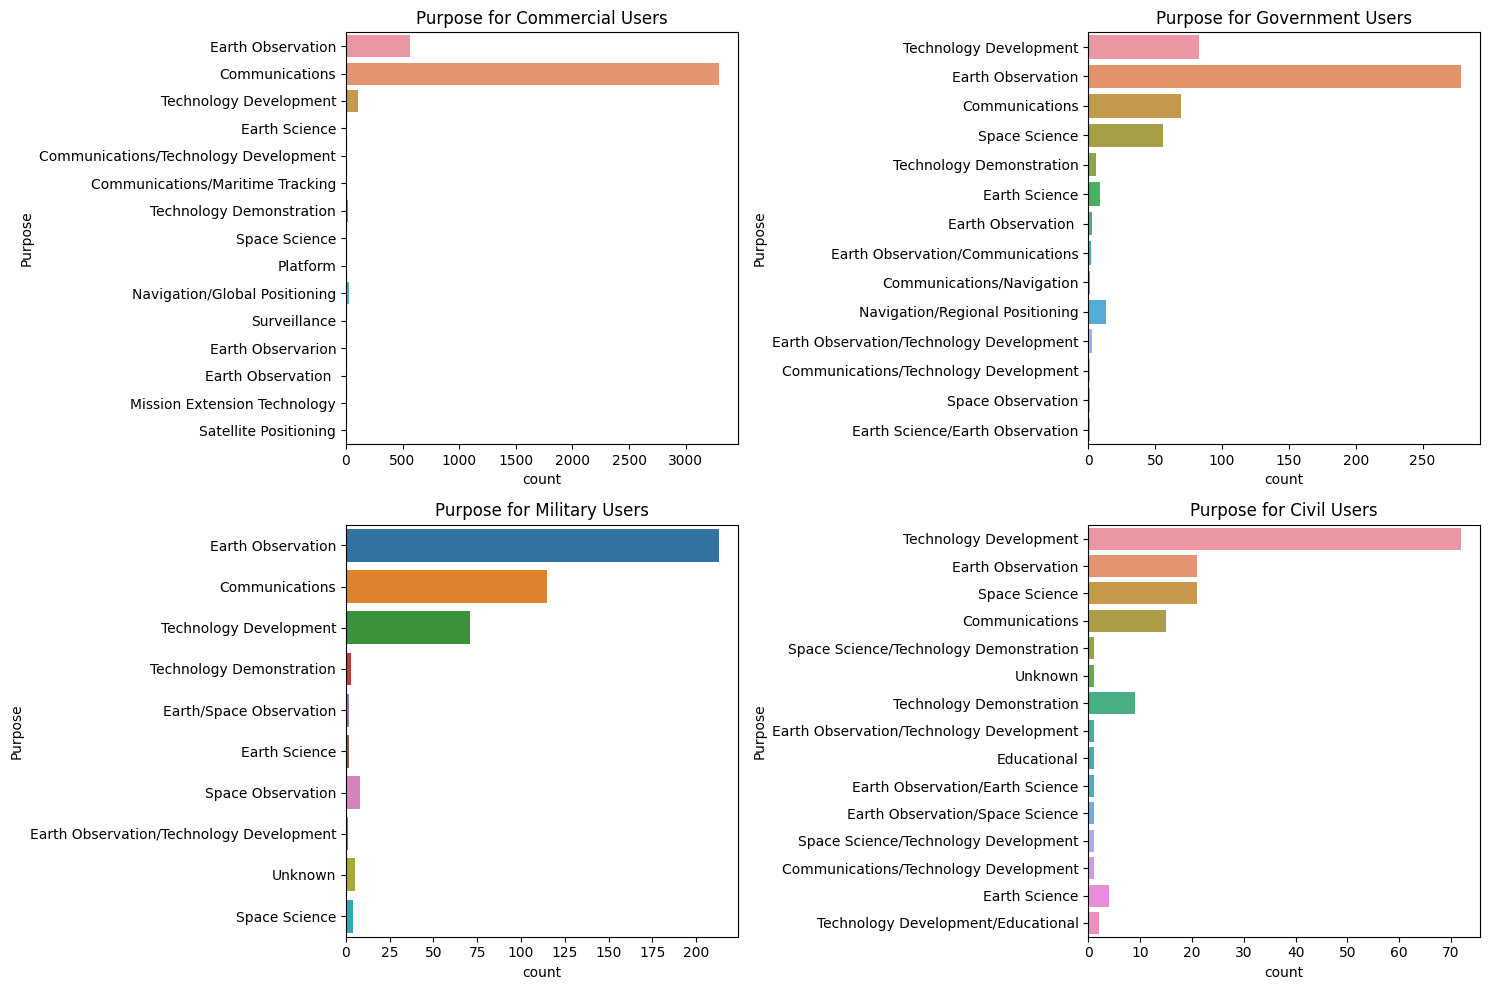

In [ ]:
fig,ax = plt.subplots(2, 2, figsize = (15,10), tight_layout = True)
sns.countplot(y="Purpose", data=Top4UserCData[Top4UserCData["UserC"] == "Commercial"], ax = ax[0,0]).set(title='Purpose for Commercial Users')
sns.countplot(y="Purpose", data=Top4UserCData[Top4UserCData["UserC"] == "Government"], ax = ax[0,1]).set(title='Purpose for Government Users')
sns.countplot(y="Purpose", data=Top4UserCData[Top4UserCData["UserC"] == "Military"], ax = ax[1,0]).set(title='Purpose for Military Users')
sns.countplot(y="Purpose", data=Top4UserCData[Top4UserCData["UserC"] == "Civil"], ax = ax[1,1]).set(title='Purpose for Civil Users')
plt.show()

###Question 4: Which class of Orbit has the most records?

Classes are divided into LEO,GEO,MEO and Elliptical. LEO had the most records, at 4700 counts, Elliptical had the lowest at 60. Furthermore, commercial used LEOs were the highest count of 3694. A barplot of the classes indicates LEO types taking up the majority. A detailed explaination of the three classes can be discussed.

**GEO(Geosynchronous Equatorial Orbit)**

GEO is a satellite furthest from Earth, it can cover large sections at once. 
It constantly stays above one particular place over Earth, such as telecommunication satellites. It can also be used for weather monitoring, because they can continually observe specific areas to see weather trends  there. The limitations on expensive launch, low mobility and usages, it makes sense to not have too much of this class.

**LEO(Low Earth Orbit)**

LEO satellites have planes that can be tilted. This means there are more available routes for satellites, which is why LEO is a very commonly used orbit. Communication satellites in LEO often work as part of a large combination or constellation of multiple satellites to give constant coverage. In order to increase coverage, several of the same or similar satellites are launched together to create a 'net' around Earth. This smoothly explains why LEO has the most records.

**MEO(Medium Earth Orbit)**

MEO comprises of a range between LEO and GEO. It does not need to take specific paths around Earth. It is very commonly used by navigation satellites, like the European Galileo system. It provides a coverage across large parts of the world all at once. It is interesting that this has less records than GEO. 

Class of Orbit
LEO           4700
GEO            565
MEO            140
Elliptical      60
Name: index, dtype: int64
------------------------------------------------------------
UserC
Commercial                        4047
Government                         527
Military                           424
Civil                              152
Government/Commercial               98
Military/Commercial                 81
Military/Government                 61
Government/Civil                    49
Military/Civil                      10
Communications                       8
Commercial/Civil                     6
Earth Observation                    1
Government/Commercial/Military       1
Name: index, dtype: int64
------------------------------------------------------------
                             UserC Class of Orbit  Count
0                       Commercial            LEO   3694
1                       Government            LEO    395
2                       Commercial            GEO  

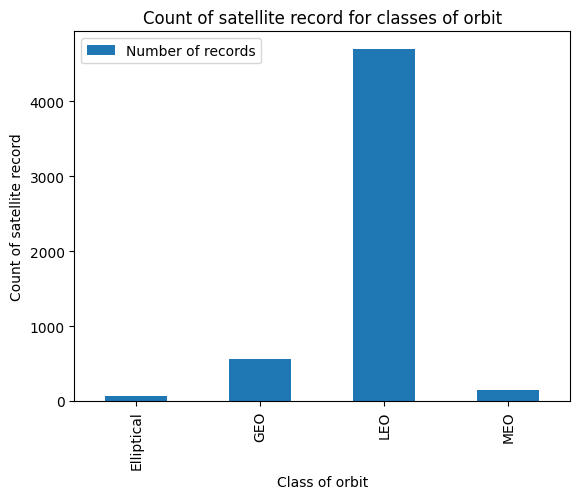

In [ ]:
print(final_clean_satellite.groupby("Class of Orbit")["index"].count().sort_values(ascending=False))
print('-'*60)
print(final_clean_satellite.groupby("UserC")["index"].count().sort_values(ascending=False))
print('-'*60)
print(final_clean_satellite.groupby(["UserC","Class of Orbit"])["index"].count().sort_values(ascending=False).to_frame("Count").reset_index())
print(' ')

final_clean_satellite.groupby(["Class of Orbit"])["index"].count().plot(legend=True, kind='bar',label='Number of records')
plt.xlabel('Class of orbit')
plt.ylabel('Count of satellite record')
plt.title('Count of satellite record for classes of orbit');


###Question 5: Which type of User has the most records?

Commercially used satellites have the most records by far, the second being Government, and closely follwed by Military. It is proof that commercial satellites are emerging and increasing.

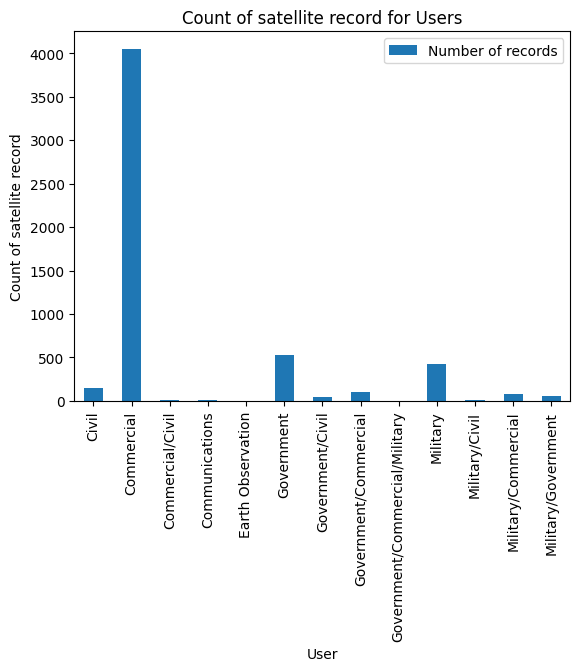

In [ ]:
final_clean_satellite.groupby(["UserC"])["index"].count().plot(legend=True, kind='bar',label='Number of records')
plt.xlabel('User')
plt.ylabel('Count of satellite record')
plt.title('Count of satellite record for Users');

In [ ]:
final_clean_satellite.groupby(["UserC"])["index"].count().sort_values(ascending=False)

UserC
Commercial                        4047
Government                         527
Military                           424
Civil                              152
Government/Commercial               98
Military/Commercial                 81
Military/Government                 61
Government/Civil                    49
Military/Civil                      10
Communications                       8
Commercial/Civil                     6
Earth Observation                    1
Government/Commercial/Military       1
Name: index, dtype: int64

###Question 6: Which type of satellite has the longest expected lifetime? And why?

**Longest expected lifetime**: 

The results show that GEO satellites have the longest average expected lifetime (13.71) and LEO satellites have the shortest average expected lifetime (4.50). Then after classifying satellites by UserC and Class of Orbit, it can be observed that satellites associated with commercial use have a relatively longer lifetime. GEO satellites used by Government/Commercial/Military has the longest average expected lifetime.



**Why:**

1. The cost of launching GEO satellites is much more expensive, thus reinforcing the benefit of longer life to maximize the return on capital. Generally, Cost estimates for a LEO Broadband gateway are usually between 2-7 million dollars while a typical GEO broadband satellite costs upwards of 100 million dollars or more. Therefore,GEO satellites need to be designed to make better use of their cost over a longer period of time.

2. Atmospheric drag has a negative impact on satellite lifetime. When the satellite's altitude is lower, the atomosphere will become denser, which will reduce the satellites' lifetime. Therefore, GEO has a longer lifetime than LEO due to the higher orbital height and more sparse atmosphere.

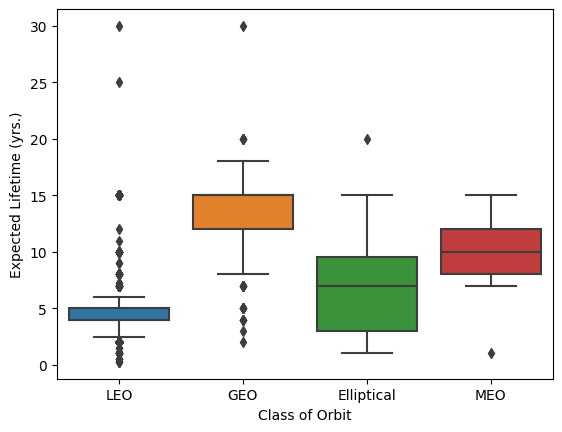

In [ ]:
sns.boxplot(x='Class of Orbit',y='Expected Lifetime (yrs.)',data=final_clean_satellite)
plt.show()

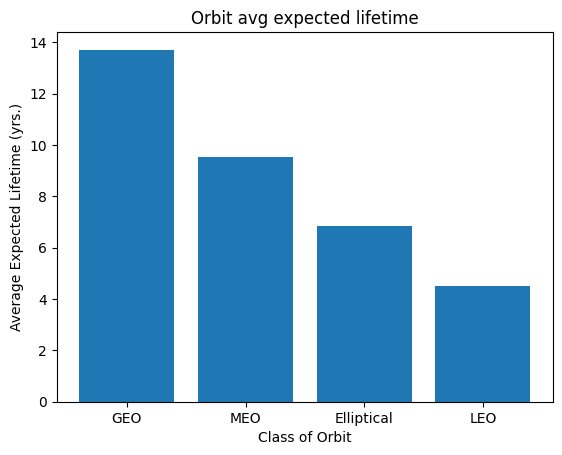

,UserC,Class of Orbit,Average Expected Lifetime (yrs.)
0,Government/Commercial/Military,GEO,15.00
1,Military/Commercial,GEO,14.92
2,Commercial,GEO,14.85
3,Government/Commercial,GEO,13.92
4,Commercial,Elliptical,13.80
5,Government/Commercial,LEO,13.78
6,Government,GEO,12.61
7,Commercial,MEO,12.00
8,Military,GEO,11.03
9,Government/Civil,GEO,10.75


In [ ]:
lifetime_byclass = final_clean_satellite.groupby("Class of Orbit")["Expected Lifetime (yrs.)"].mean().round(2).sort_values(ascending=False).to_frame('Average Expected Lifetime (yrs.)').reset_index()
plt.bar(x='Class of Orbit',height='Average Expected Lifetime (yrs.)', data=lifetime_byclass)
plt.title('Orbit avg expected lifetime')
plt.xlabel('Class of Orbit')
plt.ylabel('Average Expected Lifetime (yrs.)')
plt.show()

final_clean_satellite.groupby(["UserC", "Class of Orbit"])["Expected Lifetime (yrs.)"].mean().round(2).sort_values(ascending=False).to_frame('Average Expected Lifetime (yrs.)').reset_index()

In [ ]:
final_clean_satellite[["Class of Orbit", "Apogee (km)", "Current Official Name of Satellite","Expected Lifetime (yrs.)"]].sort_values("Expected Lifetime (yrs.)", ascending = False)

,Class of Orbit,Apogee (km),Current Official Name of Satellite,Expected Lifetime (yrs.)
5195,GEO,"35,788",Turksat 5A,30.0
1160,LEO,422,International Space Station,30.0
2272,LEO,723,OTB-1,25.0
2517,GEO,"35,824",Shijian 20,20.0
939,GEO,"35,795",GOES-R,20.0
...,...,...,...,...
5457,LEO,512,OHS-3,NaN
5458,LEO,511,OHS-4,NaN
5459,LEO,773,Ziyuan 1-02C,NaN
5463,LEO,499,Ziyuan 3-3,NaN


In [ ]:
final_clean_satellite[["Class of Orbit", "Current Official Name of Satellite", "Expected Lifetime (yrs.)"]].sort_values("Expected Lifetime (yrs.)", ascending = False).iloc[[1,2]]

,Class of Orbit,Current Official Name of Satellite,Expected Lifetime (yrs.)
1160,LEO,International Space Station,30.0
2272,LEO,OTB-1,25.0


Further reading:

Environmental factors can influence satellite lifetime. When the satellite's altitude is lower, the atomosphere will become denser, thus the satellites are more affected by atmospheric drag. GEO satellites' altitude is much higher than LEO satellites' so we try to find out if GEO satellites have a longer expected lifetime in general.

Here we selected Class of Orbit, Official Name of Satellite, Apogee (km), and Expected Lifetime (yrs.) to analyze. Apogee reflects the different orbital altitudes of different satellites. The result shows that almost all satellites with an expected lifetime of more than 15 years are GEO satellites. Turksat 5A has the longest expected lifetime (30 yrs) of all GEO satellites.

###Question 7: What's the trend for the number of satellite launched wordwide or for the countries with the most records?

In a broad perspecitive, the number of satellites have had a gradual increase starting fron the 1960s,having the first big jump at around 2015. The increasing speed starts to skyrocket near 2022. Followed by a sharp decrease after. What is interesting to note is that this trend is similar to the USA satellite record trend, this is due to the fact that the USA makes up a huge portion of this data record.

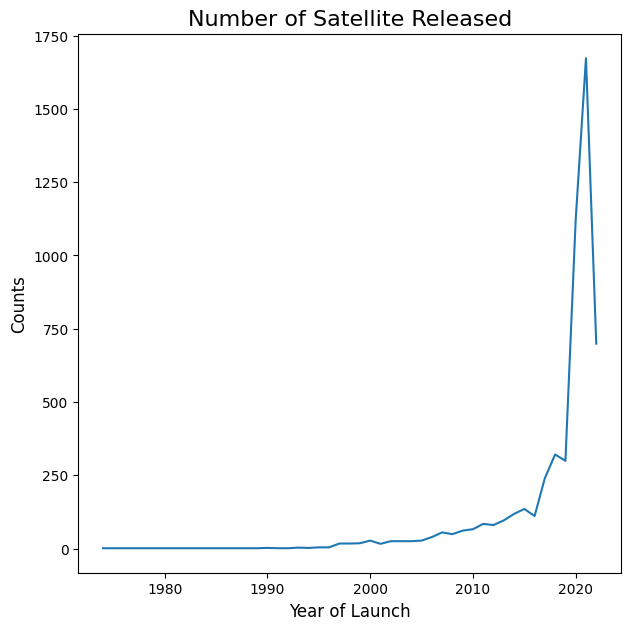

In [ ]:
Satellite_Released = final_clean_satellite.groupby(["Year_of_Launch"])["index"].count().to_frame("Count").reset_index()

plt.figure(figsize=(7,7))
plt.plot(Satellite_Released["Year_of_Launch"], Satellite_Released["Count"])
plt.title("Number of Satellite Released", fontsize = 16)
plt.xlabel("Year of Launch", fontsize = 12)
plt.ylabel("Counts", fontsize = 12)
plt.show()

#Phase Two

###Question 2 continued: Investigating the spike in satellite launches by country (USA) 

As we saw earlier, there was an upward increasing trend for satellites from 2015 onwards. USA showed the greatest variance in the count of launched satellites after 2015. We will therefore dive a little deeper into the spike of satellites and conclude with some research as to what may have caused this spike.

In [ ]:
usa_launches = final_clean_satellite[final_clean_satellite['Country of Operator/Owner'].isin(['USA'])]
usa_launches.shape # 3,415 USA Satellites launched

(3415, 30)

In [ ]:
usa_launches.groupby('Operator/Owner')['Operator/Owner'].count().sort_values(ascending=False).head(5)
# Space X drove the massive spike in satellites

Operator/Owner
SpaceX                          2219
Planet Labs, Inc.                215
Swarm Technologies               151
Spire Global Inc.                124
Iridium Communications, Inc.      75
Name: Operator/Owner, dtype: int64

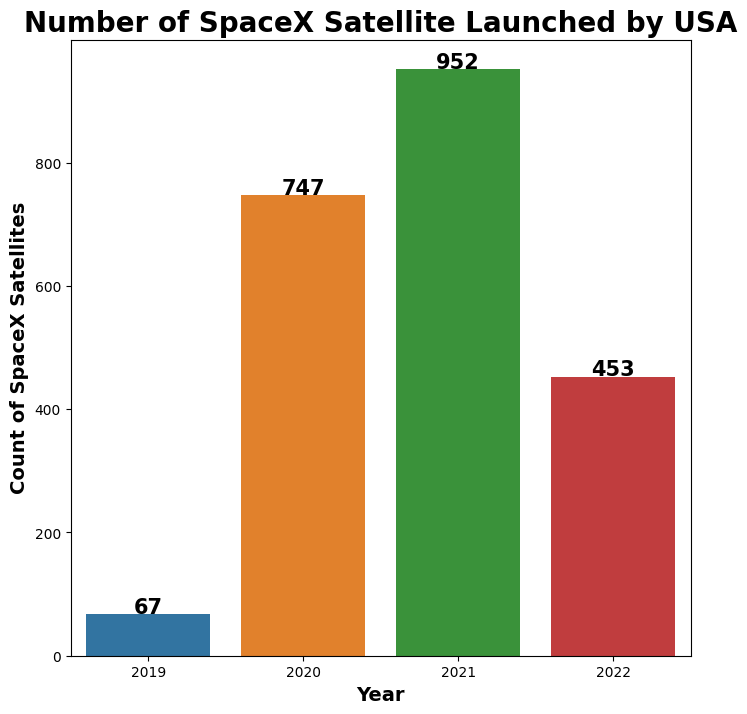

In [ ]:
spacex_launches = usa_launches[usa_launches['Operator/Owner'] == 'SpaceX']
spacex_launches_ct = spacex_launches.groupby(["Year_of_Launch"])["index"].count().sort_values(ascending=False).to_frame("Counts").reset_index()
plt.figure(figsize=(8, 8))
plots = sns.barplot(x='Year_of_Launch', y = 'Counts', data=spacex_launches_ct)

# Iterrating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points',fontweight='bold')
 
# Setting the label for x-axis
plt.xlabel('Year', size=14,fontweight='bold')

# Setting the label for y-axis
plt.ylabel("Count of SpaceX Satellites", size=14,fontweight='bold')
 
# Setting the title for the graph
plt.title("Number of SpaceX Satellite Launched by USA", size=20,fontweight='bold')
 
# Finally showing the plot
plt.show()

SpaceX launched its first 60 **starlink satellites** in May 2019. 

**Starlink Satellite** is a satellite internet constellation operated by SpaceX, providing satellite Internet access coverage to 40 countries. As of September 2022, Starlink consists of over 3,000 mass-produced small satellites in low Earth orbit (LEO), which communicate with designated ground transceivers. Starlink provides internet access to over 500,000 subscribers as of June 2022.

**It also aims for global mobile phone service after 2023.**

###Question 3 continued: invistigating using purpose on Multi-user satellites

To proceed with this section, select the satellites that are multi-users, taking the form Government/Civil, filtering out rows that contain '/'. The following table shows that the combination of government use and commercial use has the most records, the second is the combination of military and commercial use. 

In [ ]:
Usercol = pd.DataFrame(final_clean_satellite.groupby(["UserC"])["index"].count()).reset_index()
Multi_user = Usercol[Usercol['UserC'].str.contains('/')].sort_values(by='index',ascending=False)
# Usercol.plot(legend=True, kind='bar',label='Number of records')
# plt.xlabel('User')
# plt.ylabel('Count of satellite record')
# plt.title('Count of satellite record for Users');
Multi_user

,UserC,index
7,Government/Commercial,98
11,Military/Commercial,81
12,Military/Government,61
6,Government/Civil,49
10,Military/Civil,10
2,Commercial/Civil,6
8,Government/Commercial/Military,1


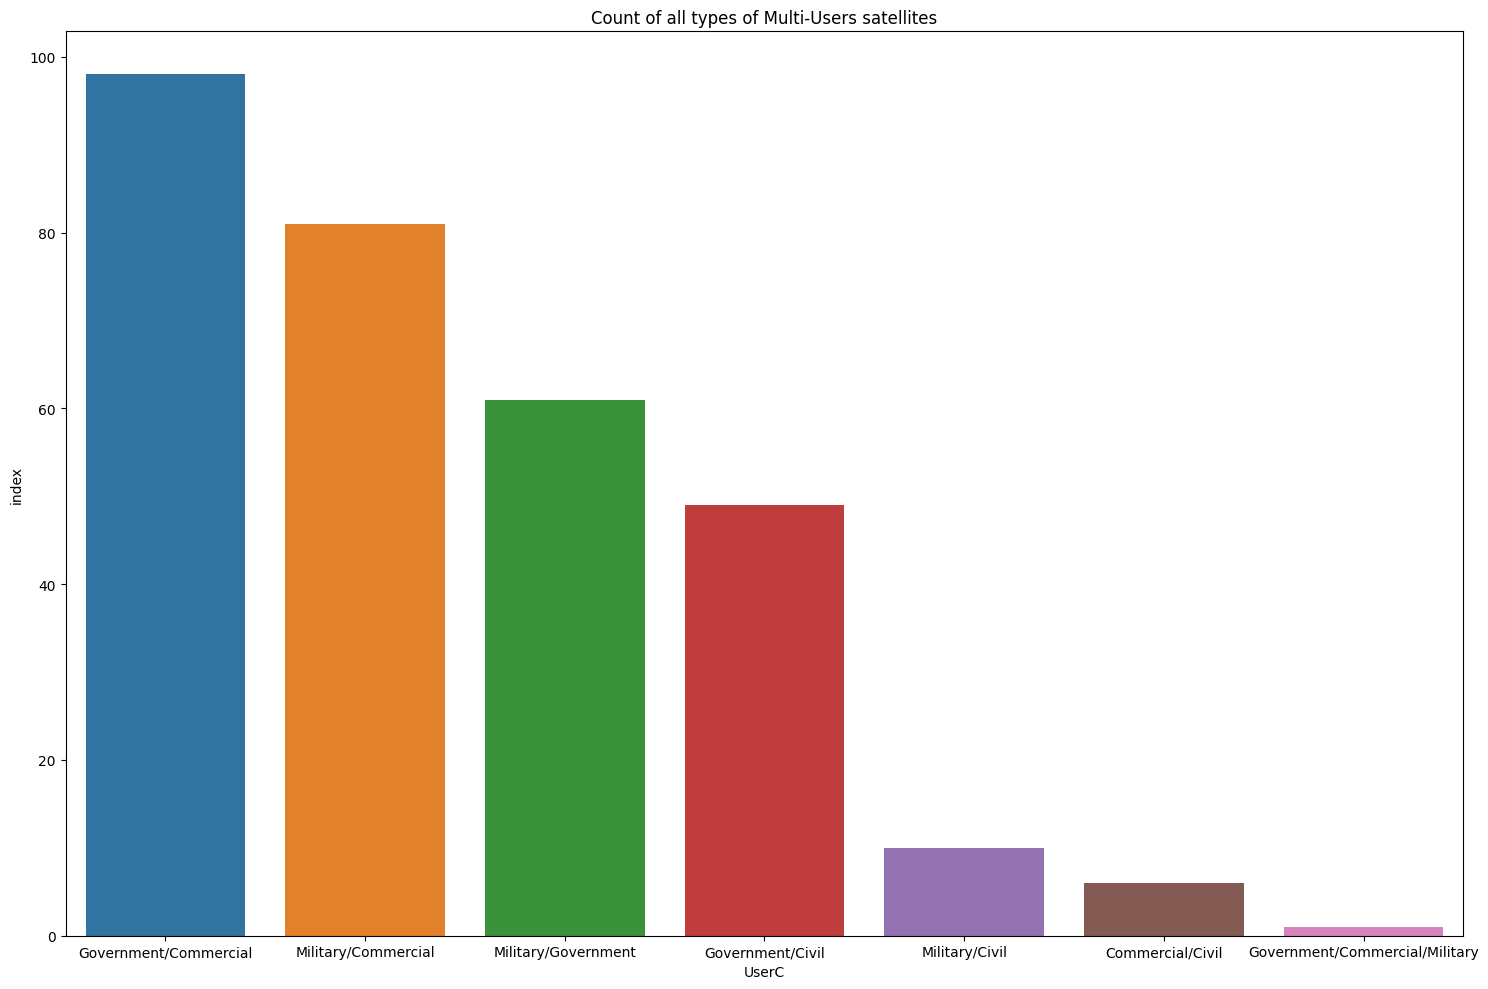

In [ ]:
fig,ax = plt.subplots(1, 1, figsize = (15,10), tight_layout = True)
sns.barplot(x='UserC',y="index", data=Multi_user).set(title='Count of all types of Multi-Users satellites');

From the bar graph above, we can see that multiusers with the most records include: Government/Commercial, Military/Commercial, Military/Government and Government/Civil. In order to better visualize and analyze the multi-users, we choose to focus on these type, as they have a lot more records than the remaining types.

In [ ]:
Multi_UserCData = final_clean_satellite[final_clean_satellite["UserC"].isin(["Government/Commercial", "Military/Commercial", "Military/Government", "Government/Civil"])]
multi_purposeTable = Multi_UserCData.groupby(["UserC","Purpose"])["index"].count().to_frame("Count").reset_index()
multi_purposeTable.sort_values(["UserC", "Count"], ascending=[True, False])

,UserC,Purpose,Count
0,Government/Civil,Earth Observation,18
3,Government/Civil,Space Science,13
5,Government/Civil,Technology Development,13
4,Government/Civil,Technology Demonstration,3
1,Government/Civil,Earth Observation/Technology Development,1
2,Government/Civil,Earth Science,1
6,Government/Commercial,Communications,87
8,Government/Commercial,Earth Observation,8
7,Government/Commercial,Communications/Technology Development,1
9,Government/Commercial,Earth Observation/Communications/Space Science,1


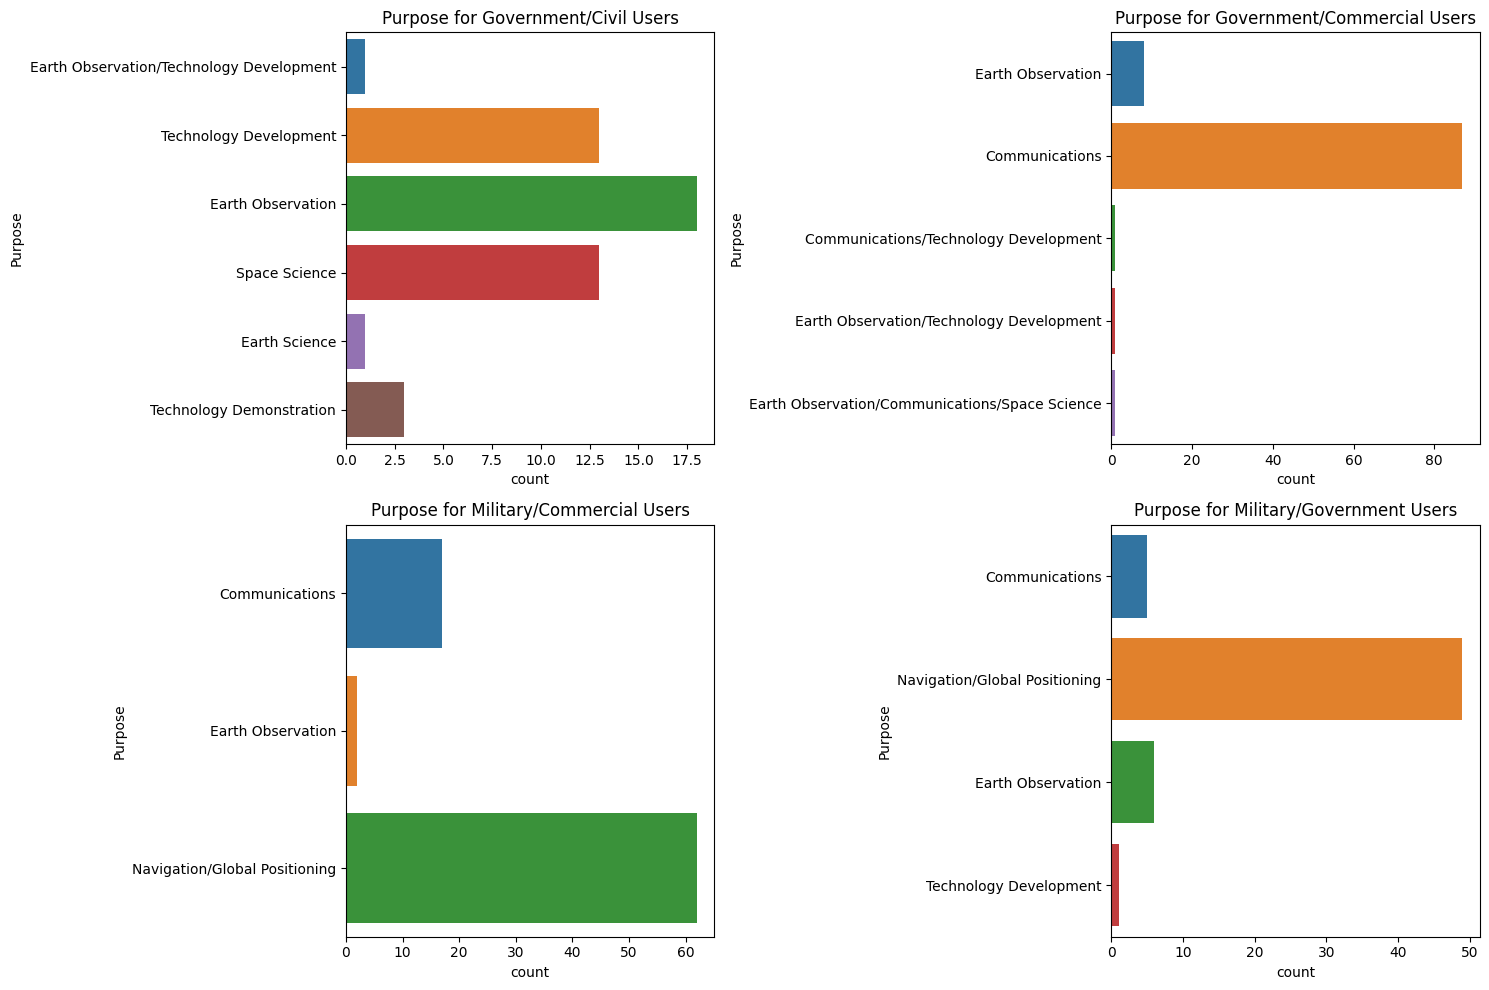

In [ ]:
fig,ax = plt.subplots(2, 2, figsize = (15,10), tight_layout = True)
sns.countplot(y="Purpose", data=Multi_UserCData[Multi_UserCData["UserC"] == "Government/Civil"], ax = ax[0,0]).set(title='Purpose for Government/Civil Users')
sns.countplot(y="Purpose", data=Multi_UserCData[Multi_UserCData["UserC"] == "Government/Commercial"], ax = ax[0,1]).set(title='Purpose for Government/Commercial Users')
sns.countplot(y="Purpose", data=Multi_UserCData[Multi_UserCData["UserC"] == "Military/Commercial"], ax = ax[1,0]).set(title='Purpose for Military/Commercial Users')
sns.countplot(y="Purpose", data=Multi_UserCData[Multi_UserCData["UserC"] == "Military/Government"], ax = ax[1,1]).set(title='Purpose for Military/Government Users')
plt.show()

Government/Civil used satellites are mostly used for earth observation. But it is evenly spread for technology development, earth observation and space science;

Government/Commercial used satellites are mostly used in communications. And commuication purpose is significantly higher than other purposes;

Military/Commercial used satellites are mostly used in navigation and global positioning. The purposes went down to three, possibily because of classified or withheld information. But Navigation purpose is still about 80 percent;

Military/Government used satellites are also mostly used in navigation and global positioning. Similar to Military/Commerical used, Navigation is the predominate purpose.

###Question 4 continued: invistigating class of orbit for Multi-user satellites

After investigating different purposes for multi-users, we can also research about which class of orbits are more frequently used by them. Keeping the multi user targets constant, we still only focus on the four types of multi-user satellites from above.

In [ ]:
multi_orbitTable = Multi_UserCData.groupby(["UserC","Class of Orbit"])["index"].count().to_frame("Count").reset_index()
multi_orbitTable.sort_values(["UserC", "Count"], ascending=[True, False])

,UserC,Class of Orbit,Count
2,Government/Civil,LEO,42
1,Government/Civil,GEO,4
0,Government/Civil,Elliptical,3
4,Government/Commercial,LEO,85
3,Government/Commercial,GEO,13
7,Military/Commercial,MEO,62
5,Military/Commercial,GEO,16
6,Military/Commercial,LEO,3
10,Military/Government,MEO,29
8,Military/Government,GEO,25


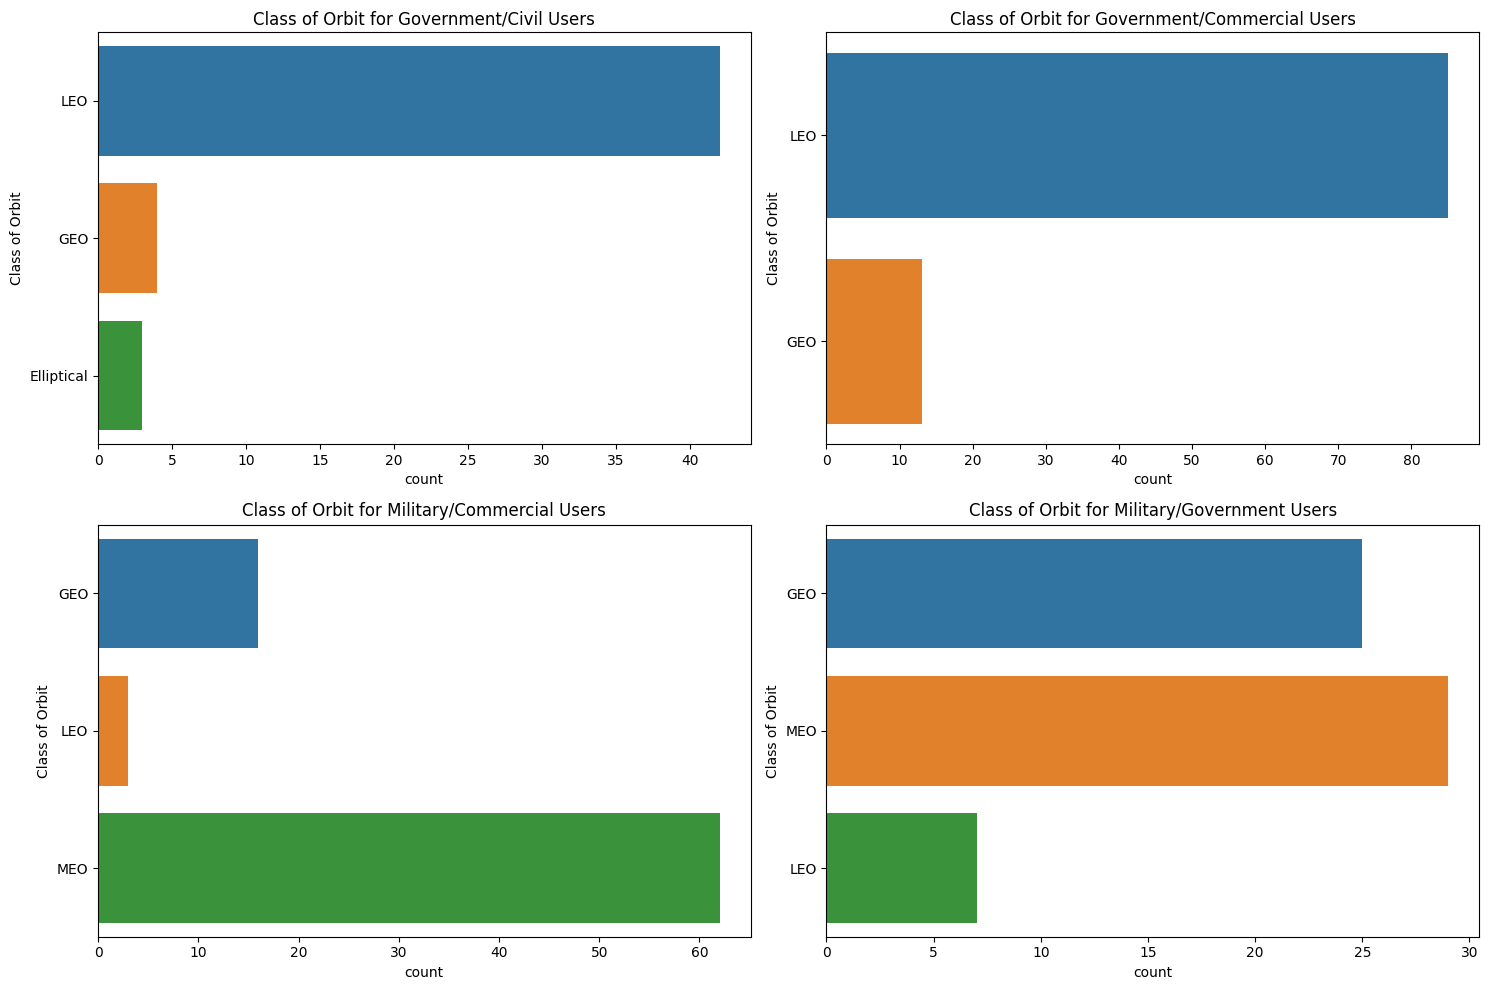

In [ ]:
fig,ax = plt.subplots(2, 2, figsize = (15,10), tight_layout = True)
sns.countplot(y="Class of Orbit", data=Multi_UserCData[Multi_UserCData["UserC"] == "Government/Civil"], ax = ax[0,0]).set(title='Class of Orbit for Government/Civil Users')
sns.countplot(y="Class of Orbit", data=Multi_UserCData[Multi_UserCData["UserC"] == "Government/Commercial"], ax = ax[0,1]).set(title='Class of Orbit for Government/Commercial Users')
sns.countplot(y="Class of Orbit", data=Multi_UserCData[Multi_UserCData["UserC"] == "Military/Commercial"], ax = ax[1,0]).set(title='Class of Orbit for Military/Commercial Users')
sns.countplot(y="Class of Orbit", data=Multi_UserCData[Multi_UserCData["UserC"] == "Military/Government"], ax = ax[1,1]).set(title='Class of Orbit for Military/Government Users')
plt.show()

Most of government/civil satellites and government/commercial are on the LEO orbit. For military/commercial satellites, most of them are on the MEO orbit. However, for millitary and government satellite, the number of them on GEO and on LEO are close to each other. 

###Question 6 continued: Satellites with a current lifetime greater than the expected lifetime

An interesting finding is that there are many satellites with current lifetimes surpassing their expected lifetimes. For example, TDRS-3 the GEO satellite has the longest current lifetime, but it has been active for 34 years,much longer than the 10 year expected lifetime.


Satellites can be broadly classified by their launch mass into small satellites (below 1200 kg), medium satellites (1200-4200 kg) and large satellites (above 4200 kg). Thus we added Launch Mass (kg.) for the following analysis. 

For a more concise and intuitive view of the results, we have chosen 25 as a threshold lifetime, as this value better reflects current lifetime greater than expected lifetime.

 
It can be observed that the majority of satellites that has been active for more than 25 years are medium satellites.

Referencing to phase 1 results, it is observed that atmospheric drag can negatively affects satellite lifetime, and satellites with larger masses will be more affected by drag, thus reducing satellite lifetime. Small satellites are less affected by atmospheric drag due to their small area to mass ratio, but they cannot be equipped with as much propellant as larger satellites to ensure constant orbit adjustment and maintain their lifetime. [source](http://www.beidou.gov.cn/zy/kpyd/201710/t20171023_4781.html)


In [ ]:
final_clean_satellite_1 = final_clean_satellite.copy()
final_clean_satellite_1['Current Lifetime (yrs.)']=2022 -final_clean_satellite_1['Year_of_Launch']

n = final_clean_satellite_1[final_clean_satellite_1["Current Lifetime (yrs.)"] > final_clean_satellite_1["Expected Lifetime (yrs.)"]]["Current Official Name of Satellite"].count()
print(n, "satellites have longer current life time than expected")

560 satellites have longer current life time than expected


In [ ]:
final_clean_satellite_1 = final_clean_satellite_1.loc[(final_clean_satellite_1["Current Lifetime (yrs.)"] > final_clean_satellite_1["Expected Lifetime (yrs.)"]) & (final_clean_satellite_1['Current Lifetime (yrs.)'] > 25)]

final_clean_satellite_1.info() #14 satellites have a current lifetime longer than 25 years
final_clean_satellite_1[final_clean_satellite_1["Current Lifetime (yrs.)"] > final_clean_satellite_1["Expected Lifetime (yrs.)"]][["Class of Orbit", "Current Official Name of Satellite", "Year_of_Launch", "Expected Lifetime (yrs.)", "Current Lifetime (yrs.)"]].sort_values("Current Lifetime (yrs.)", ascending = False).head(14)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 65 to 5213
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   index                               14 non-null     int64  
 1   Name of Satellite, Alternate Names  14 non-null     object 
 2   Current Official Name of Satellite  14 non-null     object 
 3   Country/Org of UN Registry          14 non-null     object 
 4   Country of Operator/Owner           14 non-null     object 
 5   Operator/Owner                      14 non-null     object 
 6   Purpose                             14 non-null     object 
 7   Detailed Purpose                    1 non-null      object 
 8   Class of Orbit                      14 non-null     object 
 9   Type of Orbit                       2 non-null      object 
 10  Longitude of GEO (degrees)          14 non-null     float64
 11  Perigee (km)                        14 non-n

,Class of Orbit,Current Official Name of Satellite,Year_of_Launch,Expected Lifetime (yrs.),Current Lifetime (yrs.)
5074,GEO,TDRS-3,1988,10.0,34
769,GEO,USA 46,1989,5.0,33
1068,LEO,Hubble Space Telescope,1990,10.0,32
2569,GEO,Skynet 4C,1990,7.0,32
5075,GEO,TDRS-5,1991,10.0,31
2461,LEO,SCD-1,1993,3.0,29
5076,GEO,TDRS-6,1993,10.0,29
1611,GEO,USA 99,1994,10.0,28
630,GEO,USA 113,1995,10.0,27
1627,GEO,MSAT 2,1995,10.0,27


In [ ]:
final_clean_satellite_1 = final_clean_satellite_1[final_clean_satellite_1["Current Lifetime (yrs.)"] > final_clean_satellite_1["Expected Lifetime (yrs.)"]][["Class of Orbit", "Current Official Name of Satellite", "Year_of_Launch", "Expected Lifetime (yrs.)", "Current Lifetime (yrs.)", "Launch Mass (kg.)"]].sort_values("Current Lifetime (yrs.)", ascending = False)
final_clean_satellite_1.head(14)

,Class of Orbit,Current Official Name of Satellite,Year_of_Launch,Expected Lifetime (yrs.),Current Lifetime (yrs.),Launch Mass (kg.)
5074,GEO,TDRS-3,1988,10.0,34,"3,180"
769,GEO,USA 46,1989,5.0,33,"2,310"
1068,LEO,Hubble Space Telescope,1990,10.0,32,"11,110"
2569,GEO,Skynet 4C,1990,7.0,32,"1,474"
5075,GEO,TDRS-5,1991,10.0,31,"3,180"
2461,LEO,SCD-1,1993,3.0,29,110
5076,GEO,TDRS-6,1993,10.0,29,"3,180"
1611,GEO,USA 99,1994,10.0,28,"4,536"
630,GEO,USA 113,1995,10.0,27,"1,156"
1627,GEO,MSAT 2,1995,10.0,27,"2,850"


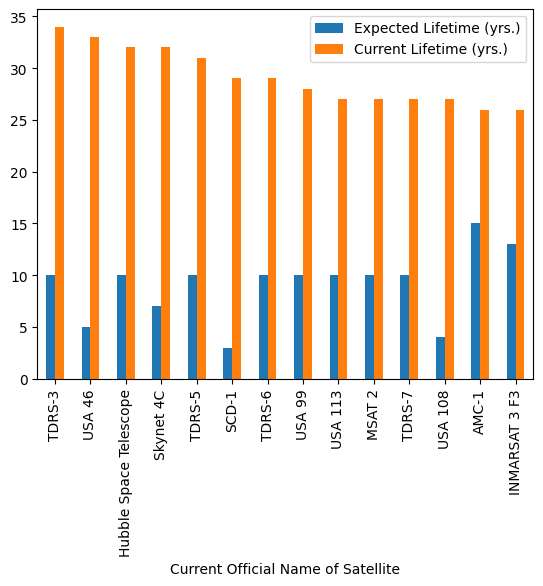

In [ ]:
#To visualize the gap between current lifetime and expected lifetime for satellites with current lifetime longer than 25 years
final_clean_satellite_1[['Current Official Name of Satellite', 'Expected Lifetime (yrs.)', 'Current Lifetime (yrs.)']].plot(x='Current Official Name of Satellite', kind='bar')

###Question 7 continued: Investigating the timing of the dramatic sharp peak

The satellites lauched by year line graph from phase 1 had given us insight on an interesting time 2015. There appears to be the first sharp increase of satellites in this year. Looking into this increase, it was not hard to find out this majorly came from commercial use USA satellites(**Question2 satellite by country linegraph**). Therefore, a deeper exploration focused on the commerical use satellites from the USA in 2015. 

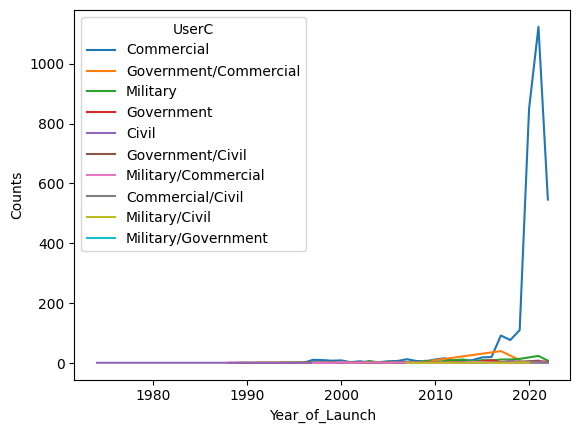

In [ ]:
USA_S = final_clean_satellite[final_clean_satellite["Country of Operator/Owner"] == "USA"].groupby(["Year_of_Launch", "UserC"])["index"].count().sort_values(ascending=False).to_frame("Counts").reset_index()
sns.lineplot(x="Year_of_Launch", y="Counts",hue="UserC", data=USA_S)

In [ ]:
#Generate the counts table by "UserC" and "Year of Launch" in USA for Commercial Users
USA_S = final_clean_satellite[(final_clean_satellite["Country of Operator/Owner"] == "USA") & (final_satellite["UserC"] == "Commercial")].groupby(["Year_of_Launch", "Purpose"])["index"].count().sort_values(ascending=False).to_frame("Counts").reset_index()

#The purpose for satellite launch before 2015 in USA for Commercial User
USA_S_before2015 = USA_S[USA_S["Year_of_Launch"] < 2015].groupby("Purpose")["Counts"].sum().sort_values(ascending=False).reset_index()

#The purpose for satellite launch not later than 2015 in USA for Commercial User
USA_S_after2015 = USA_S[USA_S["Year_of_Launch"] >= 2015].groupby("Purpose")["Counts"].sum().sort_values(ascending=False).reset_index()

Taking a closer at the satellite counts before and after 2015, directly comparing the satellite counts by purpose. Evidently so, there are sharp increases in communication and earth observation use satellites. Almost 18 times more for communication, and 75 times for earth observation.

In [ ]:
#Merge two tables, compare the purpose for communication users before 2015 and after 2015
USA_S_2015 = pd.merge(USA_S_before2015, USA_S_after2015, on = 'Purpose', how='outer')
USA_S_2015.columns = ["Purpose", "<2015", ">=2015"]

#Fill NA to 0
USA_S_2015['<2015'] = USA_S_2015['<2015'].fillna(0)

#Change the datatype from float to int
USA_S_2015["<2015"] = USA_S_2015["<2015"].astype(int)

USA_S_2015

,Purpose,<2015,>=2015
0,Communications,135,2407
1,Earth Observation,5,374
2,Technology Development,5,25
3,Surveillance,0,12
4,Technology Demonstration,0,11
5,Earth Science,0,3
6,Mission Extension Technology,0,2
7,Earth Observation,0,1
8,Satellite Positioning,0,1


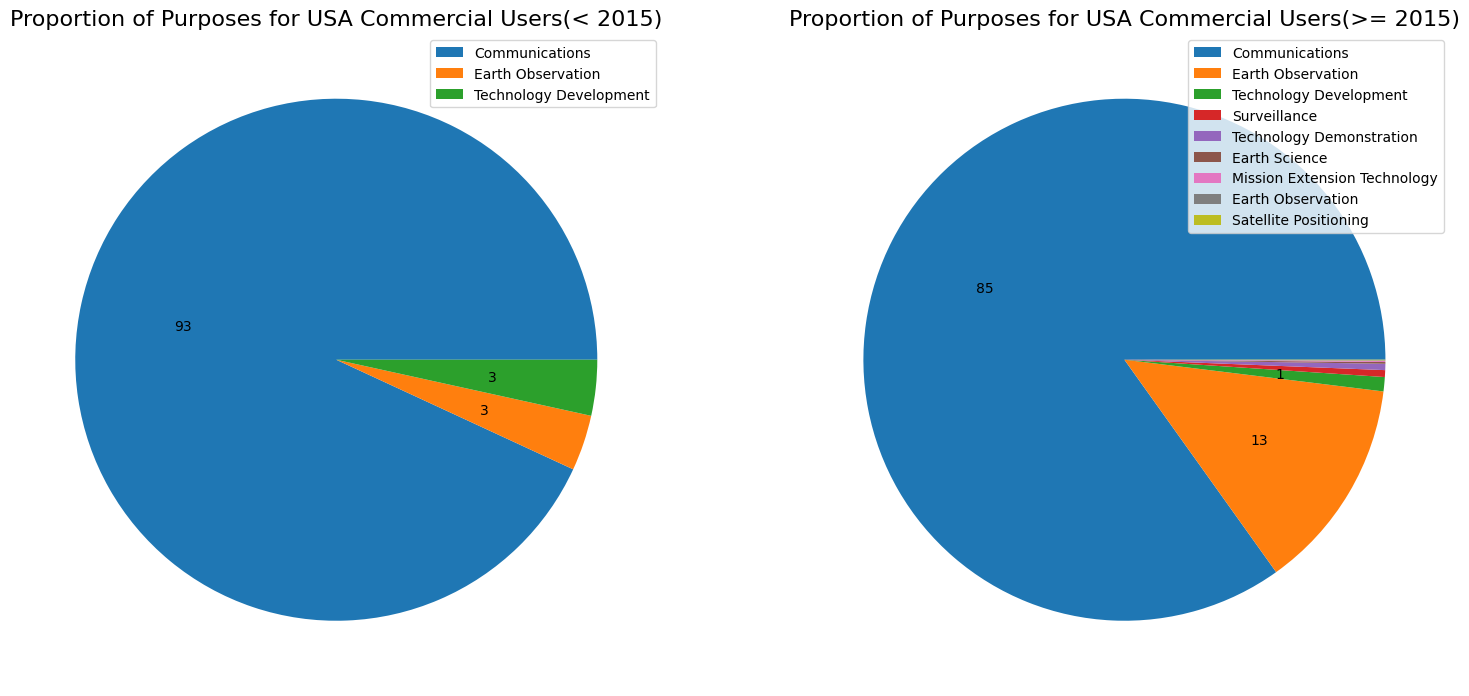

In [ ]:
fig, ax = plt.subplots(figsize = (100,100))

ax1 = plt.subplot2grid(shape=(10, 10), loc=(0,0))
ax2 = plt.subplot2grid(shape=(10, 10), loc=(0,1))

#Draw the pie chart for the proportion of purpose for satellite launch before 2015 in USA for Commercial User
ax1.pie(USA_S_before2015["Counts"], autopct='%.0f')
ax1.set_title("Proportion of Purposes for USA Commercial Users(< 2015)", size = 16)
ax1.legend(USA_S_before2015["Purpose"])
ax1.grid()

#Draw the pie chart for the proportion of purpose for satellite launch no ealier than 2015 in USA for Commercial User
ax2.pie(USA_S_after2015["Counts"], autopct=lambda p: format(p, '.0f') if p > 0.6 else None)
ax2.set_title("Proportion of Purposes for USA Commercial Users(>= 2015)", size = 16)
ax2.legend(USA_S_after2015["Purpose"])
ax2.grid()

### Question 8: Which satellite has the largest Launch Vehicle & Fuel Weight? 

According to observation, Delta 4 Heavy and Titan IV produced by the USA have the largest Launch Vehicle & Fuel Weight-8000 kilograms. They are used for Earth Observation purpose. **However, according to the Wikipedia, the weight for Delta 4 Heavy is written as 733,000 kg at launch. so there is a massive difference on the number.** Even though this difference is substantial, but it does provide a good idea on which satellites are the heaviest in terms of launch vehical and fuel weight.

 

**User Handbook for Delta 4 Heavy:** 
https://web.archive.org/web/20131014123330/http://www.ulalaunch.com/site/docs/product_cards/guides/Delta%20IV%20Users%20Guide%20June%202013.pdf



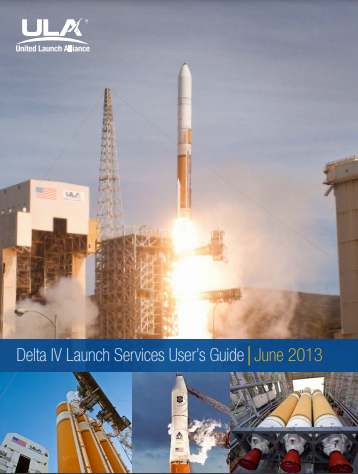

In [ ]:
final_clean_satellite.loc[final_clean_satellite['Launch Vehicle'] == 'Delta 4 Heavy',['Launch Vehicle','Name of Satellite, Alternate Names','Country of Operator/Owner','Launch Mass (kg.)']]

,Launch Vehicle,"Name of Satellite, Alternate Names",Country of Operator/Owner,Launch Mass (kg.)
11,Delta 4 Heavy,"Advanced Orion 10 (Mentor, NRO L-44, USA 311)",USA,"5,400"
14,Delta 4 Heavy,"Advanced Orion 6 (Mentor, NRO L-26, USA 202)",USA,"5,400"
15,Delta 4 Heavy,"Advanced Orion 7 (Mentor, NRO L-32, USA 223)",USA,"5,000"
16,Delta 4 Heavy,"Advanced Orion 8 (Mentor, NRO L-15, USA 237)",USA,"5,000"
17,Delta 4 Heavy,"Advanced Orion 9 (Mentor, NRO L-37, USA 268)",USA,"5,000"
1349,Delta 4 Heavy,"Keyhole 6 (NRO L49, Advanced KH-11, KH-12-6, I...",USA,"18,000"
1350,Delta 4 Heavy,"Keyhole 7 (NRO L65, Advanced KH-11, Improved C...",USA,"18,000"
1351,Delta 4 Heavy,"Keyhole 8 (NRO L71, Advanced KH-11, Improved C...",USA,"18,000"
1352,Delta 4 Heavy,"Keyhole 9 (NRO L82, Advanced KH-11, Evolved Im...",USA,"20,000"


In [ ]:
mass_dataset_final['Launch Vehicle & Fuel Weight (kg.)'] = mass_dataset_final['Launch Mass (kg.)'] - mass_dataset_final['Dry_Mass']

In [ ]:
mass_dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 438
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Name of Satellite, Alternate Names  410 non-null    object
 1   Country of Operator/Owner           410 non-null    object
 2   Launch Mass (kg.)                   410 non-null    int64 
 3   Launch Vehicle                      410 non-null    object
 4   Dry_Mass                            410 non-null    int64 
 5   Month_of_Launch                     410 non-null    int64 
 6   Year_of_Launch                      410 non-null    int64 
 7   Purpose                             410 non-null    object
 8   Launch Vehicle & Fuel Weight (kg.)  410 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 32.0+ KB


In [ ]:
max = mass_dataset_final['Launch Vehicle & Fuel Weight (kg.)'].max()

max_weight = mass_dataset_final.loc[mass_dataset_final['Launch Vehicle & Fuel Weight (kg.)'] == max,:]

pd.pivot_table(max_weight, values='Launch Vehicle & Fuel Weight (kg.)', index=['Launch Vehicle','Purpose','Country of Operator/Owner','Name of Satellite, Alternate Names'])

Launch Vehicle & Fuel Weight (kg.)
Launch Vehicle Purpose           Country of Operator/Owner Name of Satellite, Alternate Names                                                    
Delta 4 Heavy  Earth Observation USA                       Keyhole 6 (NRO L49, Advanced KH-11, KH-12-6, Im...                                8000
                                                           Keyhole 7 (NRO L65, Advanced KH-11, Improved Cr...                                8000
                                                           Keyhole 8 (NRO L71, Advanced KH-11, Improved Cr...                                8000
Titan IV       Earth Observation USA                       Keyhole 5 (Advanced KH-11, KH-12-5, Improved Cr...                                8000

#Summary of key findings




*   **Satellite distribution by country:** 

  US (62%) had the most number of satellites launched. This 
large volume is primarily driven by SpaceX. China (10%) came second followed closely by United Kingdom (9%) and Russia (3%)

*   **Satellite purpose for each user:**

  Satellites are used for commercial purposes (75%), goverment purposes (10%) ,military purposes (8%), civil purposes (3%) . The remaining are used for multi purposes.

*   **Satellite usage by country:**

  US: Most of the satellites are used for commercial purposes (87%)

  China: Roughly two-thirds of the satellites are used for commercial and government purposes equally (68%), while a small portion is used for military (18%)

  UK: Almost all satellites are used for commercial purposes (>98%)

  Russia: Majority of the satellites are used for Commercial and Military purposes (82%)

  *   **Satellite launched in USA:**

      USA launched 3,415 satellites in total. Within these lauches, 2,219 satellites were launched by SpaceX. After taking a closer look at the launch trend, we found that this trend shape was majorly impacted by SpaceX. To be specific, 747 in 2020, 952 in 2021 and 453 for the first half of 2022(up until May 2022).


* **Satellite detailed purpose for each user (Commercial, Government, Military and Civil):**

  For Commercial Users, the main purposes are Communications and Earth Observation. 

  For Government Users, the main purposes are Earth Observation, Technology Development, Communication and Space Science. 

  For Military Users, the main purposes include Earth Observation and Communications. 

  Civil Users were mostly used for Technology Development

  *    **Purpose of Multi-user satellites:**

      Multi-user have four main types, with Government-Commercial having the most records. Government-Commercial is mainly used for communication. 






*  **Satellite launch trends over time:**

  The top 10 countries for satellite launches over years 1974-2022 are USA, China, UK, Russia, Multinational, Japan, ESA, India, Canada and Germany. There has been a steady increase in satellites launched up until 2015. After that USA, UK, China and Russia have shown large spikes with a peak in 2020. Subsequently, there has been a decline, most likely due to COVID-19 delaying launches.

*   **Satellite orbit class distribution**

  Around 86% of total satellites fall under LEO(Low Earth Orbit), one of the most common orbits, due to its close proximity to Earth. Approximately 90% of LEO Satellites are used for commerical purposes. Around 10% of satellites fall under GEO(Geosynchronous Equatorial Orbit), which is the furthest from Earth and 3% fall under MEO (Medium Earth Orbit)


*   **Expected lifetime for satellites**

  GEO satellites have the longest average expected lifetime (13.71 years) and LEO satellites have the shortest average expected lifetime (4.50 years). Satellites associated with commercial use have a relatively longer lifetime. GEO satellites used by Government/Commercial/Military has the longest average expected lifetime.
  
  * **Current lifetime greater than expected lifetime:**
    
        There are 560 satellites for this category. Moreover, 14 satellites have a current lifetime of over 25 years. The majority of these satellites are medium satellites.

* **Satellite record count trend:**

  There are two peaks observed for satellite records by year, one for 2015 and the other for 2019. The reason for this peak is the increase of satellites lauched by the USA. And, commercial use satellites make up over 80 percent. This is then discovered to be SpaceX launched satellites.



#Conclusion

As satellites reach a new stage of development, it becomes more and more important to understand the trends and distributions. With the UCS Satellite Database as a source, investigtion on satellite features are carried out, which are then used to draw valuable insights.USA has the largest satellite record count, essentially shaping the satellite record trend, main contributor being SpaceX's commuication satellites. Furthermore, discovering the majority of satellites are LEO satellites. To add on to this, lifetime and mass patterns for satellites can surely inspire another study due to the uniqueness of patterns found. Subsequently, opening 'space' to dig deeper about satellite features.

#Reference

[1]https://www.tutorialspoint.com/conditional-removal-of-labels-in-matplotlib-pie-chart

[2]https://www.youtube.com/watch?v=-MKacZkw-5M

[3]https://simpleflying.com/leo-geo-meo-satellites-whats-the-difference/

[4]https://www.mckinsey.com/industries/aerospace-and-defense/our-insights/large-leo-satellite-constellations-will-it-be-different-this-time

[5]https://space.stackexchange.com/questions/1212/why-is-the-life-span-of-a-leo-satellite-less-than-that-of-a-geo-satellite

[6]https://earthobservatory.nasa.gov/features/OrbitsCatalog#:~:text=There%20are%20essentially%20three%20types,farthest%20away%20from%20the%20surface.

[7]https://www.ulalaunch.com/rockets/delta-iv
[8]https://web.archive.org/web/20131014123330/http://www.ulalaunch.com/site/docs/product_cards/guides/Delta%20IV%20Users%20Guide%20June%202013.pdf

[9]https://spacenews.com/cost-of-delta-4-heavy-launches-is-down-but-the-real-price-is-a-secret/